<a href="https://colab.research.google.com/github/Amritha07dec/MCN/blob/sample_generation/ODE_simulator_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/Amritha07dec/MCN.git
%cd MCN

Cloning into 'MCN'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 31 (delta 9), reused 15 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 2.13 MiB | 9.35 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/MCN/MCN


# ODE simulator

## Importing dependencies

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import yaml

from scipy.integrate import solve_ivp




## Code for simulation with a generic ODE RHS

In [12]:
def simulate_ode_system(rhs_func, t_span, y0, params, solver='RK45', t_eval=None):
    """
    Simulate the ODE system.

    Parameters:
    - rhs_func: The right-hand side of the ODE as a function of (t, y, params).
    - t_span: Tuple (t_0, t_final), the time span for the simulation.
    - y0: Initial conditions as an array.
    - params: Parameters required by the rhs_func.
    - solver: The ODE solver method ('RK45', 'RK23', 'DOP853', 'LSODA', etc.).
    - t_eval: Array of time points at which to store the solution.

    Returns:
    - sol: Solution object containing times and states.
    """
    # Define the ODE system as a lambda function to pass the parameters
    def ode_func(t, y):
        return rhs_func(t, y, params)

    # Solve the ODE system
    sol = solve_ivp(ode_func, t_span, y0, method=solver, t_eval=t_eval)

    return sol


# Updated phase space plot function
def plot_phase_space(sol, state_indices=(0, 1, 2)):
    """
    Plots the phase space of the solution. Automatically switches to 3D if there are more than two states.

    Args:
    sol: Solution object from the ODE solver (such as the one returned by scipy's solve_ivp).
    state_indices: Tuple specifying which state variables to plot (default is (0, 1)).
                   For a 3D plot, pass 3 indices, for example (0, 1, 2).
    """
    y = sol.y
    num_states = y.shape[0]

    # 2D phase space
    if num_states == 2 or len(state_indices) ==2:
        plt.figure(figsize=(8, 6))
        plt.plot(y[state_indices[0]], y[state_indices[1]], lw=0.8)
        plt.xlabel(f"State {state_indices[0]}")
        plt.ylabel(f"State {state_indices[1]}")
        plt.title("2D Phase Space")
        plt.grid(True)
        plt.show()

    # 3D phase space if the system has more than two states
    elif len(state_indices) == 3 and num_states >= 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(y[state_indices[0]], y[state_indices[1]], y[state_indices[2]], lw=0.8)
        ax.set_xlabel(f"State {state_indices[0]}")
        ax.set_ylabel(f"State {state_indices[1]}")
        ax.set_zlabel(f"State {state_indices[2]}")
        ax.set_title("3D Phase Space")
        plt.show()

    else:
        print("State indices must be 2 or 3 for phase space plotting.")
def plot_trajectories(sol):
    """
    Plot the trajectories of all state variables over time.

    Parameters:
    - sol: Solution object from solve_ivp.
    """
    plt.figure(figsize=(8, 6))
    for i in range(sol.y.shape[0]):
        plt.plot(sol.t, sol.y[i], label=f'State {i}')
    plt.xlabel('Time')
    plt.ylabel('State Variables')
    plt.title('State Variables Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()




## Demo of simulating a system from the model dictionary

In [13]:
# importing models dictionary
from ode_models_dictionary import ode_systems


Simulating Linear_1D (Set 1)with perturbation factor -0.25
Parameters: [0.5]
Initial conditions: [0.75]
Expected behavior: growth


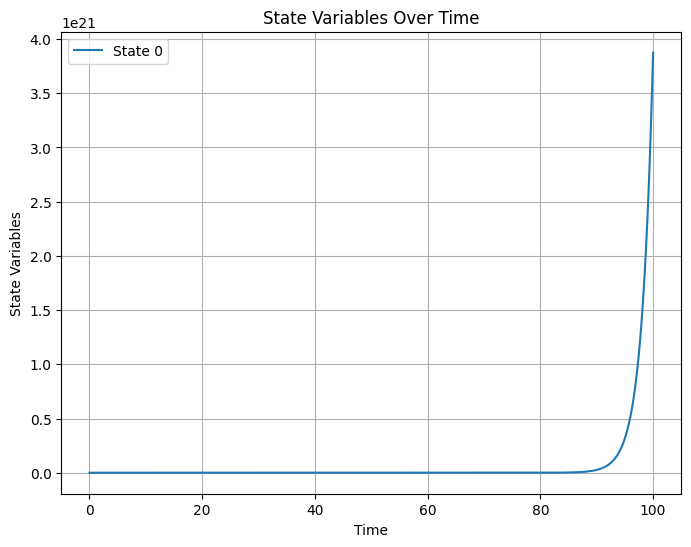

Pickle file saved at: pickle_files/Linear_1D_Set-1_Deg-Poly_1_0_Params-0.5_IC-0.75.pkl

Simulating Linear_1D (Set 1)with perturbation factor 0.0
Parameters: [0.5]
Initial conditions: [1.0]
Expected behavior: growth


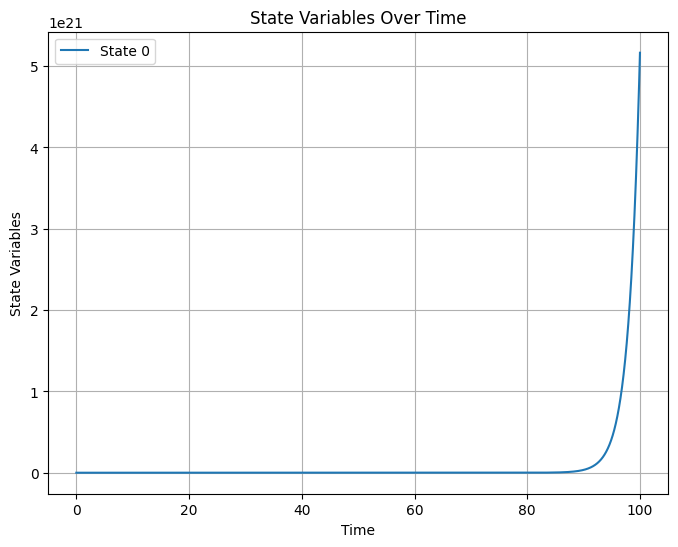

Pickle file saved at: pickle_files/Linear_1D_Set-1_Deg-Poly_1_0_Params-0.5_IC-1.0.pkl

Simulating Linear_1D (Set 1)with perturbation factor 0.25
Parameters: [0.5]
Initial conditions: [1.25]
Expected behavior: growth


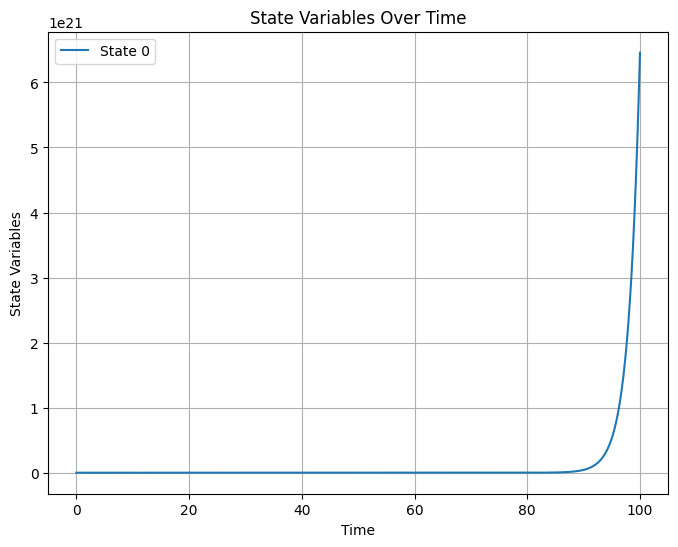

Pickle file saved at: pickle_files/Linear_1D_Set-1_Deg-Poly_1_0_Params-0.5_IC-1.25.pkl

Simulating Linear_1D (Set 2)with perturbation factor -0.25
Parameters: [-0.5]
Initial conditions: [0.75]
Expected behavior: decay


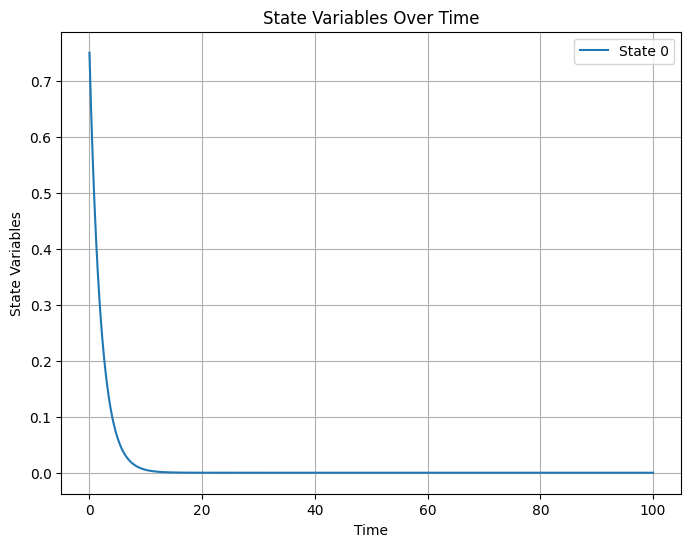

Pickle file saved at: pickle_files/Linear_1D_Set-2_Deg-Poly_1_0_Params--0.5_IC-0.75.pkl

Simulating Linear_1D (Set 2)with perturbation factor 0.0
Parameters: [-0.5]
Initial conditions: [1.0]
Expected behavior: decay


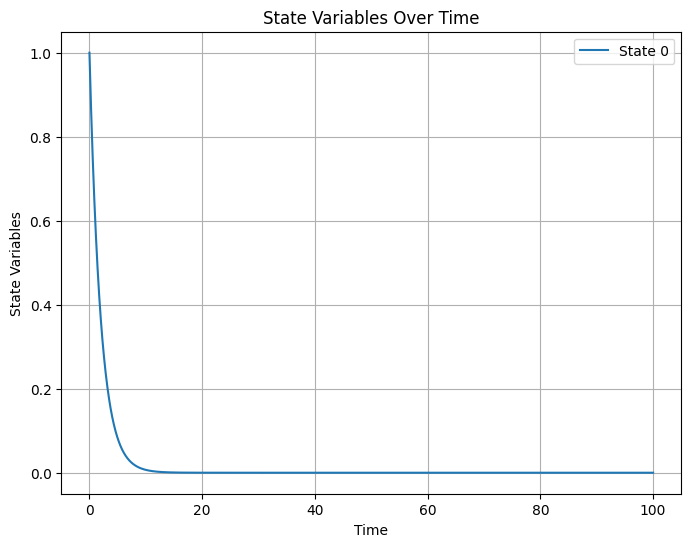

Pickle file saved at: pickle_files/Linear_1D_Set-2_Deg-Poly_1_0_Params--0.5_IC-1.0.pkl

Simulating Linear_1D (Set 2)with perturbation factor 0.25
Parameters: [-0.5]
Initial conditions: [1.25]
Expected behavior: decay


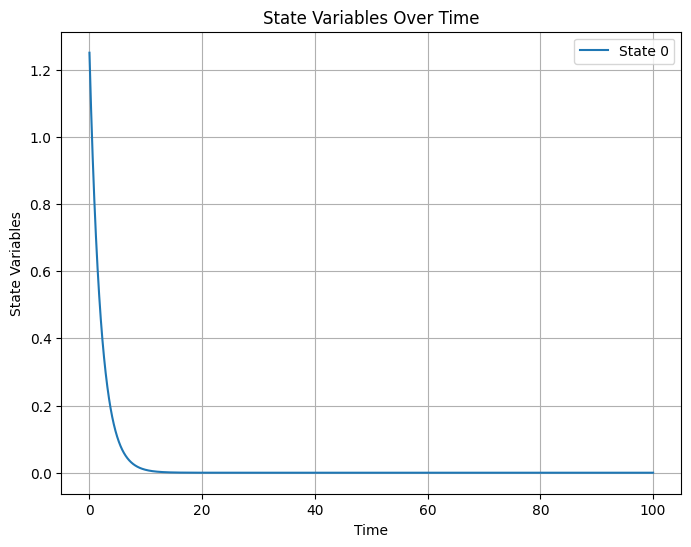

Pickle file saved at: pickle_files/Linear_1D_Set-2_Deg-Poly_1_0_Params--0.5_IC-1.25.pkl

Simulating Linear_2D_Harmonic_Oscillator (Set 1)with perturbation factor -0.25
Parameters: [1.0]
Initial conditions: [0.75, 0.0]
Expected behavior: cyclic (simple harmonic oscillator)


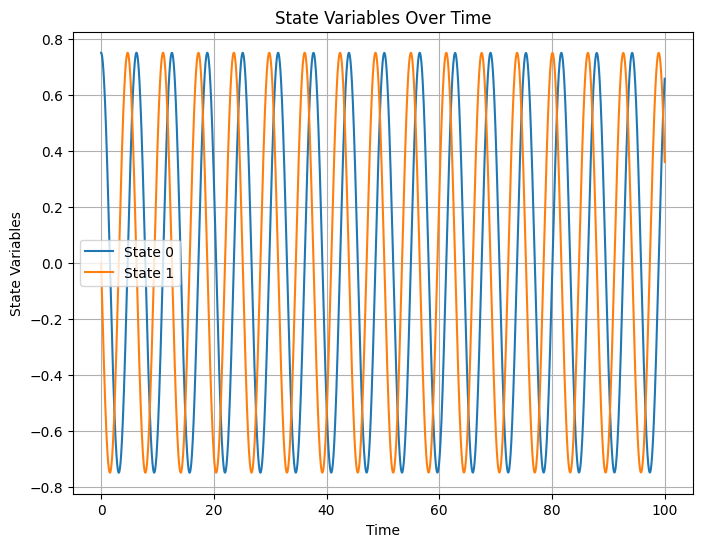

Pickle file saved at: pickle_files/Linear_2D_Harmonic_Oscillator_Set-1_Deg-Poly_1_0_Params-1.0_IC-0.75_0.0.pkl

Simulating Linear_2D_Harmonic_Oscillator (Set 1)with perturbation factor 0.0
Parameters: [1.0]
Initial conditions: [1.0, 0.0]
Expected behavior: cyclic (simple harmonic oscillator)


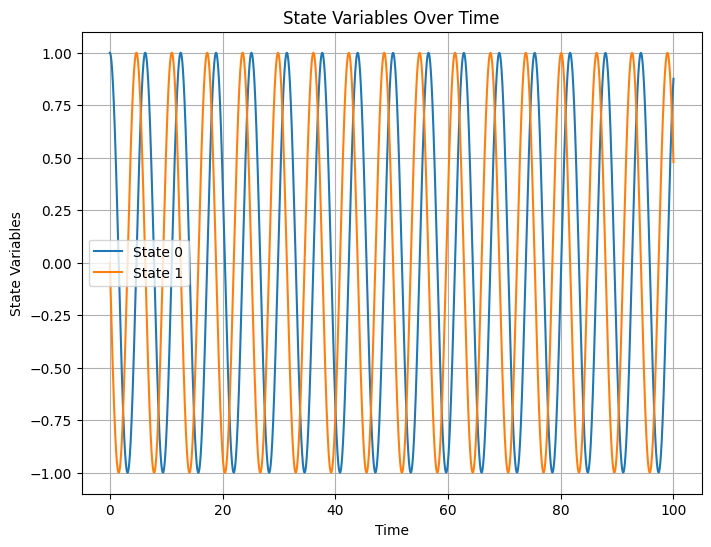

Pickle file saved at: pickle_files/Linear_2D_Harmonic_Oscillator_Set-1_Deg-Poly_1_0_Params-1.0_IC-1.0_0.0.pkl

Simulating Linear_2D_Harmonic_Oscillator (Set 1)with perturbation factor 0.25
Parameters: [1.0]
Initial conditions: [1.25, 0.0]
Expected behavior: cyclic (simple harmonic oscillator)


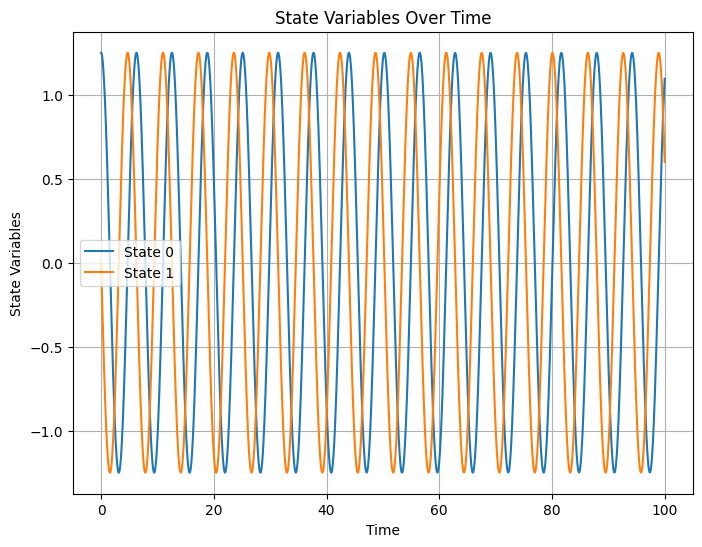

Pickle file saved at: pickle_files/Linear_2D_Harmonic_Oscillator_Set-1_Deg-Poly_1_0_Params-1.0_IC-1.25_0.0.pkl

Simulating Linear_2D_Harmonic_Oscillator (Set 2)with perturbation factor -0.25
Parameters: [0.25]
Initial conditions: [0.75, 0.0]
Expected behavior: cyclic (slower oscillation)


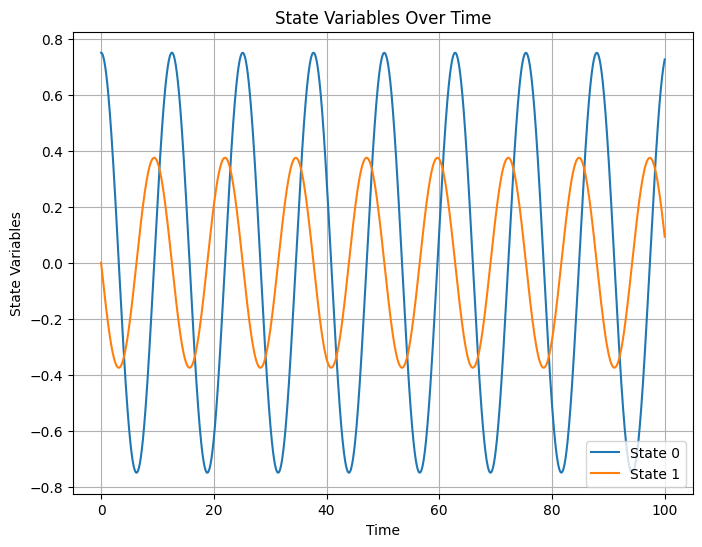

Pickle file saved at: pickle_files/Linear_2D_Harmonic_Oscillator_Set-2_Deg-Poly_1_0_Params-0.25_IC-0.75_0.0.pkl

Simulating Linear_2D_Harmonic_Oscillator (Set 2)with perturbation factor 0.0
Parameters: [0.25]
Initial conditions: [1.0, 0.0]
Expected behavior: cyclic (slower oscillation)


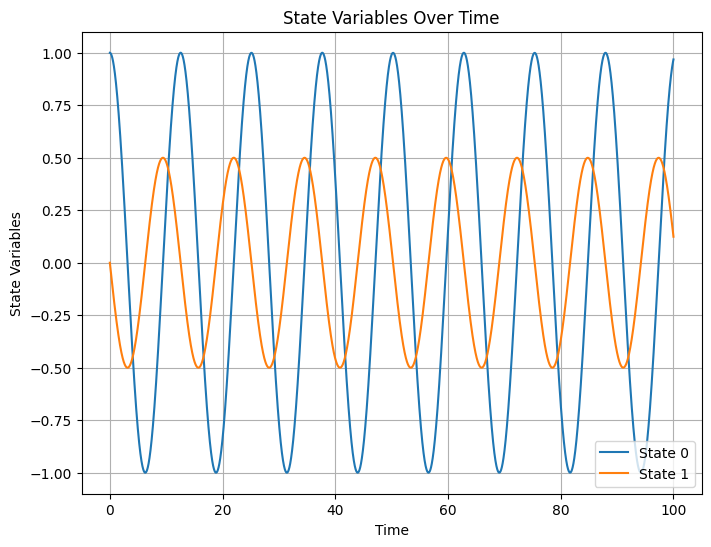

Pickle file saved at: pickle_files/Linear_2D_Harmonic_Oscillator_Set-2_Deg-Poly_1_0_Params-0.25_IC-1.0_0.0.pkl

Simulating Linear_2D_Harmonic_Oscillator (Set 2)with perturbation factor 0.25
Parameters: [0.25]
Initial conditions: [1.25, 0.0]
Expected behavior: cyclic (slower oscillation)


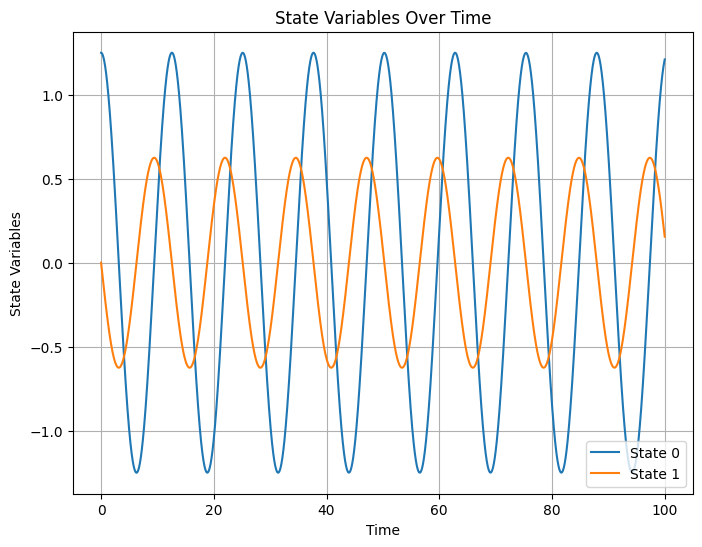

Pickle file saved at: pickle_files/Linear_2D_Harmonic_Oscillator_Set-2_Deg-Poly_1_0_Params-0.25_IC-1.25_0.0.pkl

Simulating Linear_3D_Coupled_Oscillators (Set 1)with perturbation factor -0.25
Parameters: [1.0, 1.0, 1.0]
Initial conditions: [0.75, 0.0, 0.0]
Expected behavior: cyclic


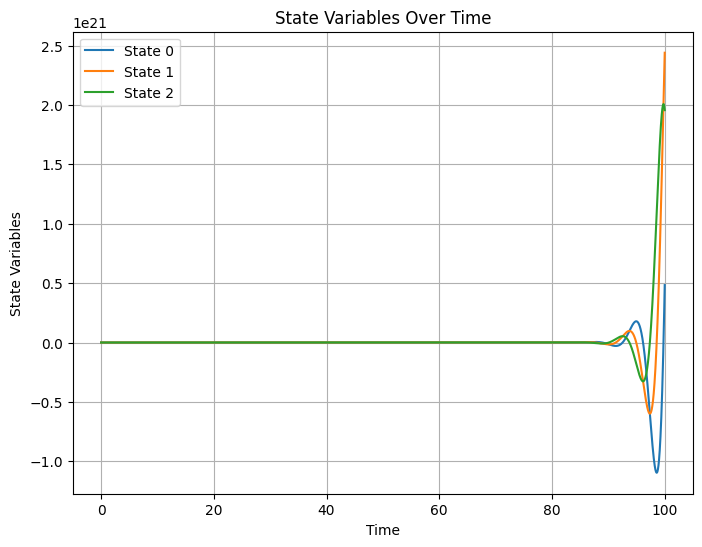

Pickle file saved at: pickle_files/Linear_3D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_IC-0.75_0.0_0.0.pkl

Simulating Linear_3D_Coupled_Oscillators (Set 1)with perturbation factor 0.0
Parameters: [1.0, 1.0, 1.0]
Initial conditions: [1.0, 0.0, 0.0]
Expected behavior: cyclic


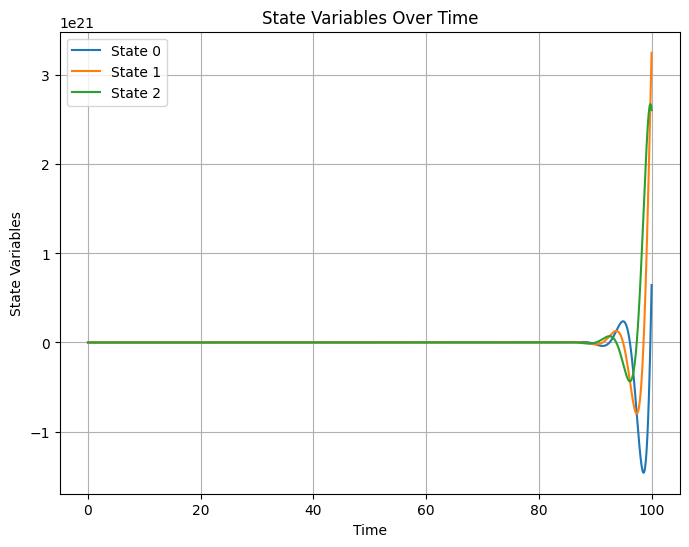

Pickle file saved at: pickle_files/Linear_3D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_IC-1.0_0.0_0.0.pkl

Simulating Linear_3D_Coupled_Oscillators (Set 1)with perturbation factor 0.25
Parameters: [1.0, 1.0, 1.0]
Initial conditions: [1.25, 0.0, 0.0]
Expected behavior: cyclic


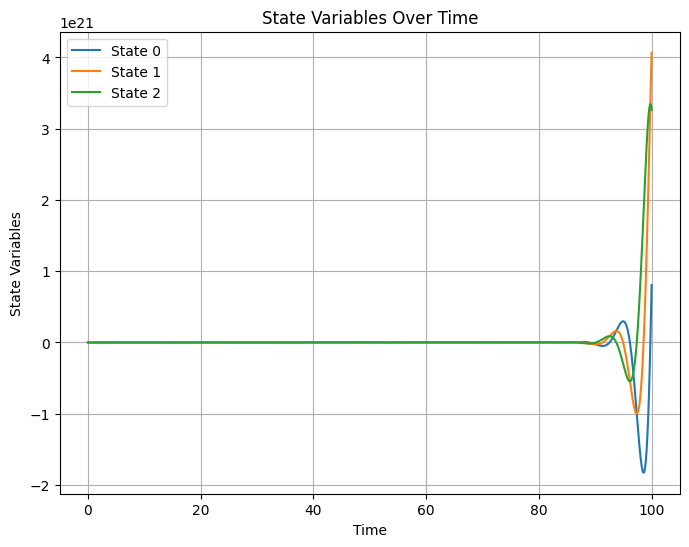

Pickle file saved at: pickle_files/Linear_3D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_IC-1.25_0.0_0.0.pkl

Simulating Linear_3D_Coupled_Oscillators (Set 2)with perturbation factor -0.25
Parameters: [0.5, 0.5, 0.5]
Initial conditions: [0.75, 0.75, 0.75]
Expected behavior: slower cyclic


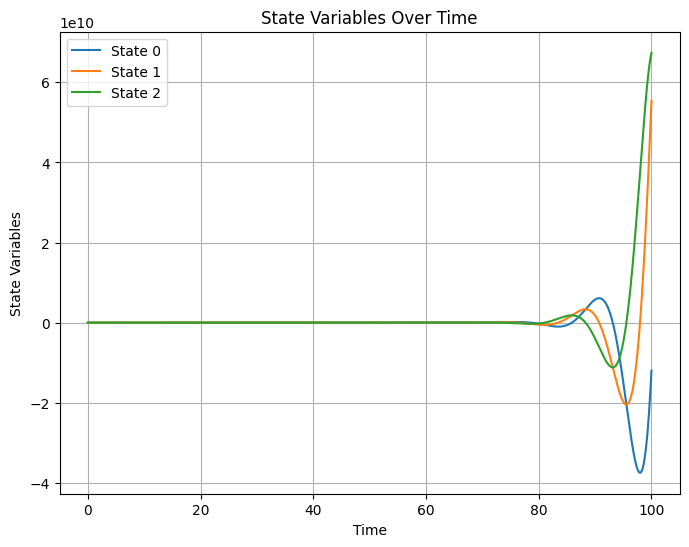

Pickle file saved at: pickle_files/Linear_3D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.5_0.5_0.5_IC-0.75_0.75_0.75.pkl

Simulating Linear_3D_Coupled_Oscillators (Set 2)with perturbation factor 0.0
Parameters: [0.5, 0.5, 0.5]
Initial conditions: [1.0, 1.0, 1.0]
Expected behavior: slower cyclic


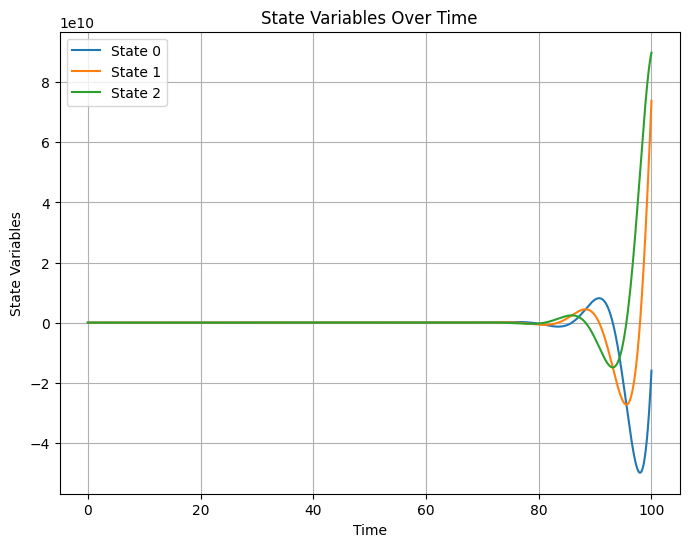

Pickle file saved at: pickle_files/Linear_3D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.5_0.5_0.5_IC-1.0_1.0_1.0.pkl

Simulating Linear_3D_Coupled_Oscillators (Set 2)with perturbation factor 0.25
Parameters: [0.5, 0.5, 0.5]
Initial conditions: [1.25, 1.25, 1.25]
Expected behavior: slower cyclic


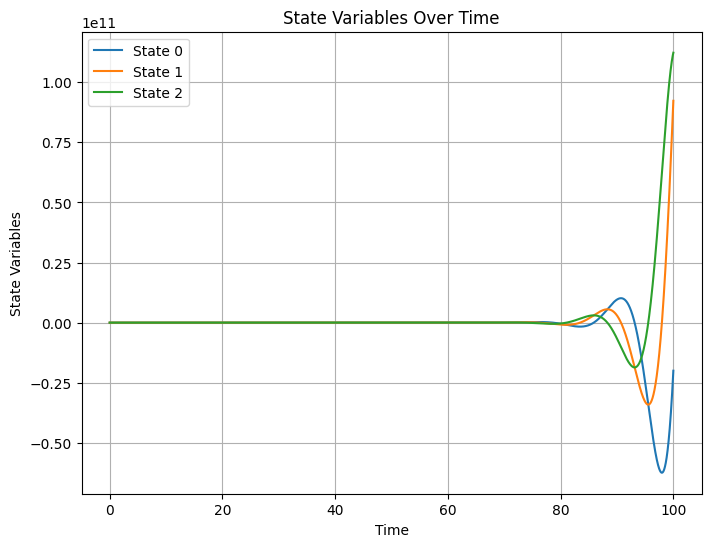

Pickle file saved at: pickle_files/Linear_3D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.5_0.5_0.5_IC-1.25_1.25_1.25.pkl

Simulating Linear_4D_Coupled_Oscillators (Set 1)with perturbation factor -0.25
Parameters: [1.0, 1.0, 1.0, 1.0]
Initial conditions: [0.75, 0.0, 0.0, 0.0]
Expected behavior: cyclic


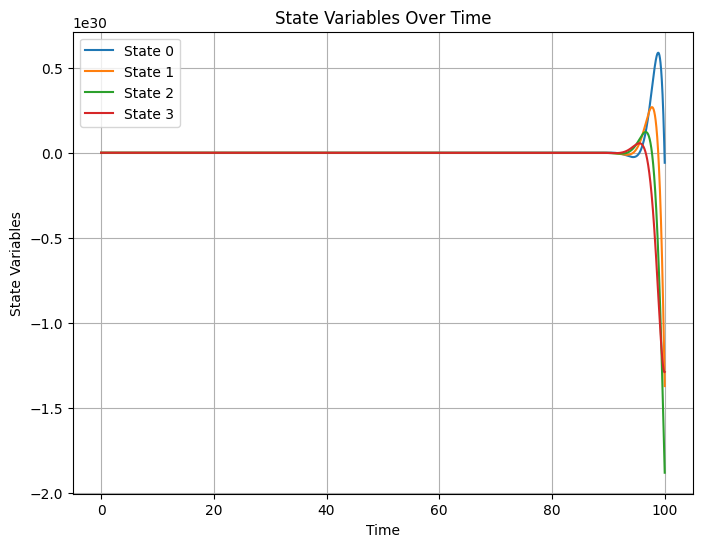

Pickle file saved at: pickle_files/Linear_4D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_1.0_IC-0.75_0.0_0.0_0.0.pkl

Simulating Linear_4D_Coupled_Oscillators (Set 1)with perturbation factor 0.0
Parameters: [1.0, 1.0, 1.0, 1.0]
Initial conditions: [1.0, 0.0, 0.0, 0.0]
Expected behavior: cyclic


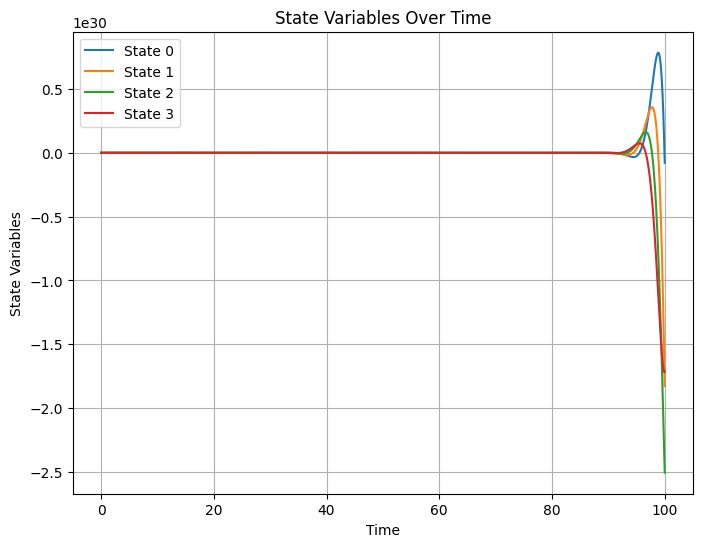

Pickle file saved at: pickle_files/Linear_4D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_1.0_IC-1.0_0.0_0.0_0.0.pkl

Simulating Linear_4D_Coupled_Oscillators (Set 1)with perturbation factor 0.25
Parameters: [1.0, 1.0, 1.0, 1.0]
Initial conditions: [1.25, 0.0, 0.0, 0.0]
Expected behavior: cyclic


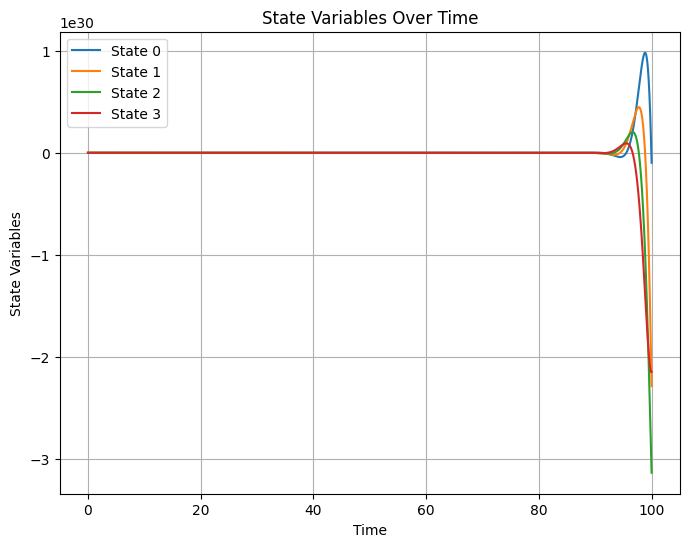

Pickle file saved at: pickle_files/Linear_4D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_1.0_IC-1.25_0.0_0.0_0.0.pkl

Simulating Linear_4D_Coupled_Oscillators (Set 2)with perturbation factor -0.25
Parameters: [0.0, 0.5, 0.5, 0.5]
Initial conditions: [0.75, 0.0, 0.0, 0.0]
Expected behavior: slower cyclic


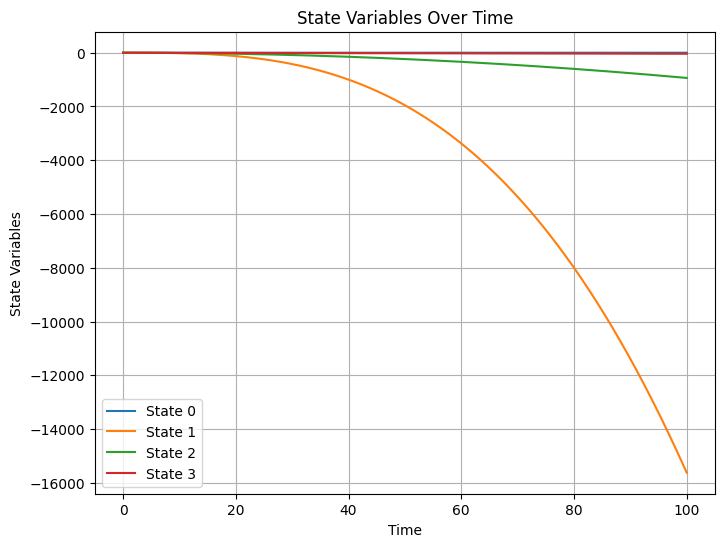

Pickle file saved at: pickle_files/Linear_4D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.0_0.5_0.5_0.5_IC-0.75_0.0_0.0_0.0.pkl

Simulating Linear_4D_Coupled_Oscillators (Set 2)with perturbation factor 0.0
Parameters: [0.0, 0.5, 0.5, 0.5]
Initial conditions: [1.0, 0.0, 0.0, 0.0]
Expected behavior: slower cyclic


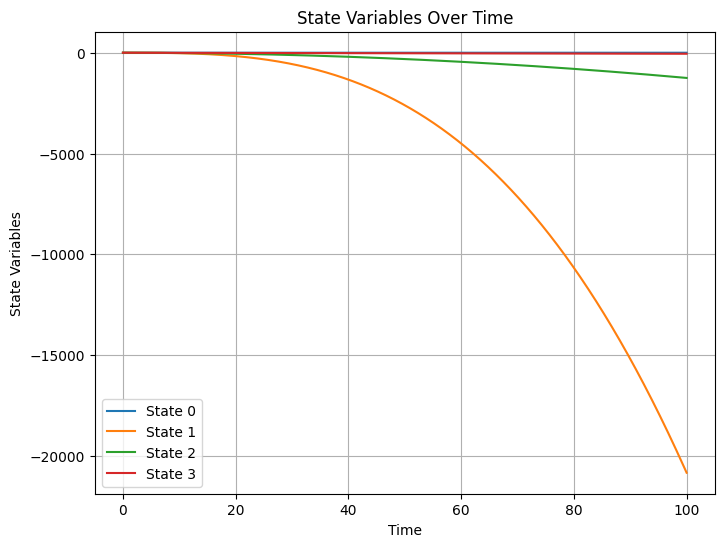

Pickle file saved at: pickle_files/Linear_4D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.0_0.5_0.5_0.5_IC-1.0_0.0_0.0_0.0.pkl

Simulating Linear_4D_Coupled_Oscillators (Set 2)with perturbation factor 0.25
Parameters: [0.0, 0.5, 0.5, 0.5]
Initial conditions: [1.25, 0.0, 0.0, 0.0]
Expected behavior: slower cyclic


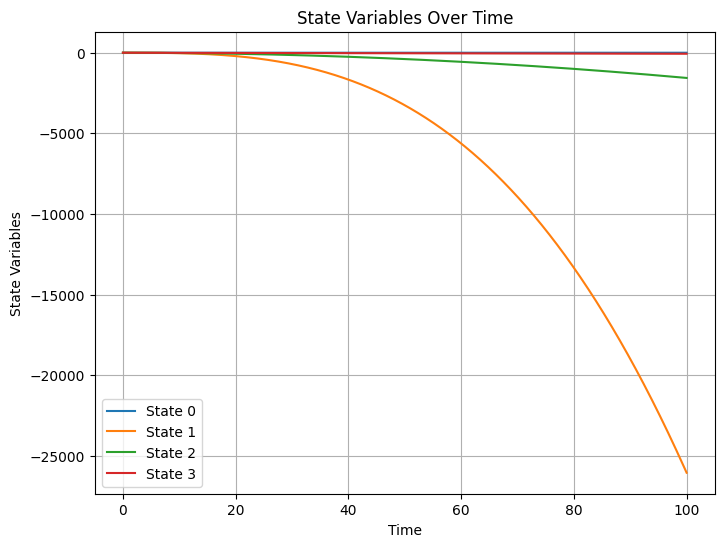

Pickle file saved at: pickle_files/Linear_4D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.0_0.5_0.5_0.5_IC-1.25_0.0_0.0_0.0.pkl

Simulating Linear_5D_Coupled_Oscillators (Set 1)with perturbation factor -0.25
Parameters: [1.0, 1.0, 1.0, 1.0, 1.0]
Initial conditions: [0.75, 0.0, 0.0, 0.0, 0.0]
Expected behavior: cyclic


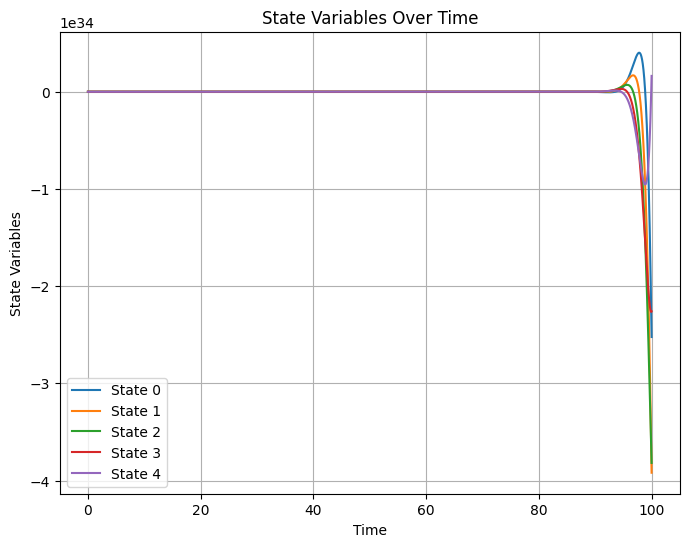

Pickle file saved at: pickle_files/Linear_5D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_1.0_1.0_IC-0.75_0.0_0.0_0.0_0.0.pkl

Simulating Linear_5D_Coupled_Oscillators (Set 1)with perturbation factor 0.0
Parameters: [1.0, 1.0, 1.0, 1.0, 1.0]
Initial conditions: [1.0, 0.0, 0.0, 0.0, 0.0]
Expected behavior: cyclic


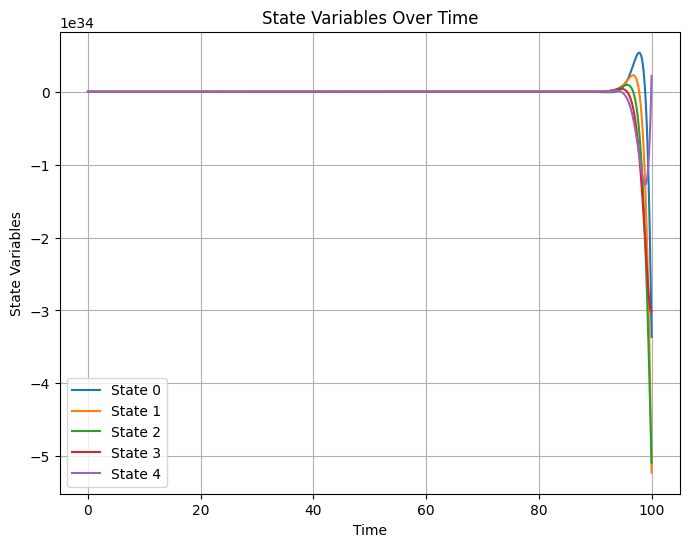

Pickle file saved at: pickle_files/Linear_5D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_1.0_1.0_IC-1.0_0.0_0.0_0.0_0.0.pkl

Simulating Linear_5D_Coupled_Oscillators (Set 1)with perturbation factor 0.25
Parameters: [1.0, 1.0, 1.0, 1.0, 1.0]
Initial conditions: [1.25, 0.0, 0.0, 0.0, 0.0]
Expected behavior: cyclic


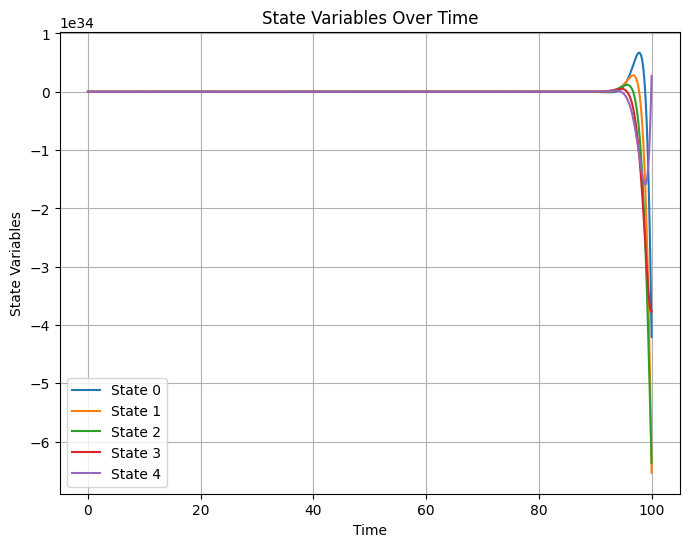

Pickle file saved at: pickle_files/Linear_5D_Coupled_Oscillators_Set-1_Deg-Poly_1_0_Params-1.0_1.0_1.0_1.0_1.0_IC-1.25_0.0_0.0_0.0_0.0.pkl

Simulating Linear_5D_Coupled_Oscillators (Set 2)with perturbation factor -0.25
Parameters: [0.5, 0.5, 0.5, 0.5, 0.5]
Initial conditions: [0.75, 82.5, 82.5, 7.5, -15.0]
Expected behavior: slower cyclic


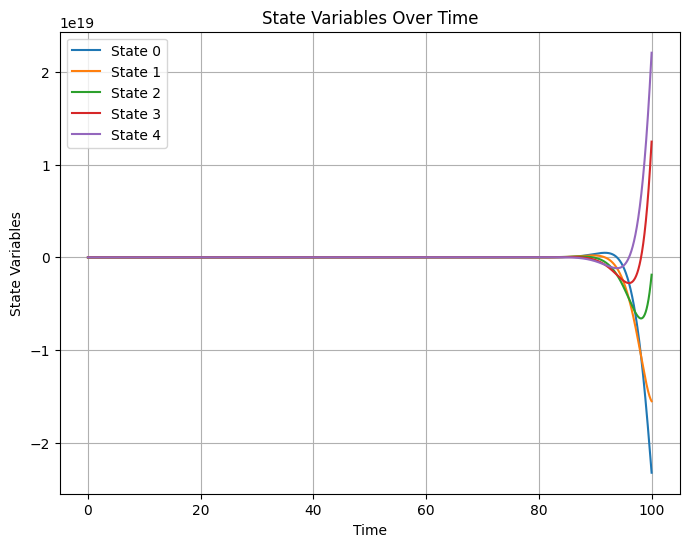

Pickle file saved at: pickle_files/Linear_5D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.5_0.5_0.5_0.5_0.5_IC-0.75_82.5_82.5_7.5_-15.0.pkl

Simulating Linear_5D_Coupled_Oscillators (Set 2)with perturbation factor 0.0
Parameters: [0.5, 0.5, 0.5, 0.5, 0.5]
Initial conditions: [1.0, 110.0, 110.0, 10.0, -20.0]
Expected behavior: slower cyclic


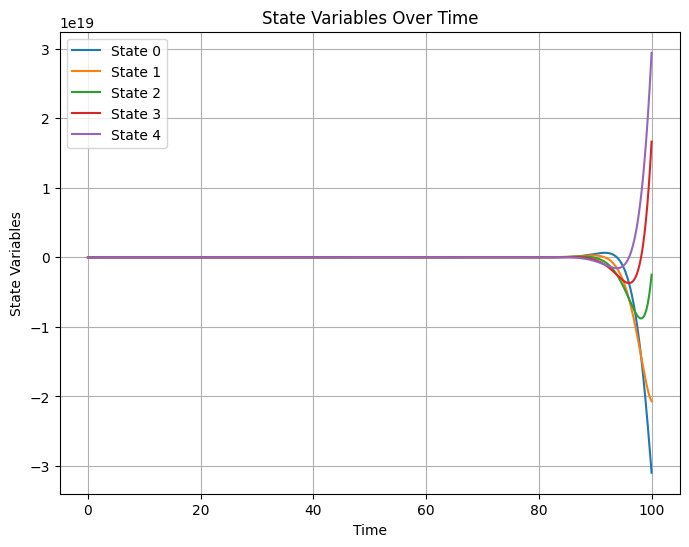

Pickle file saved at: pickle_files/Linear_5D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.5_0.5_0.5_0.5_0.5_IC-1.0_110.0_110.0_10.0_-20.0.pkl

Simulating Linear_5D_Coupled_Oscillators (Set 2)with perturbation factor 0.25
Parameters: [0.5, 0.5, 0.5, 0.5, 0.5]
Initial conditions: [1.25, 137.5, 137.5, 12.5, -25.0]
Expected behavior: slower cyclic


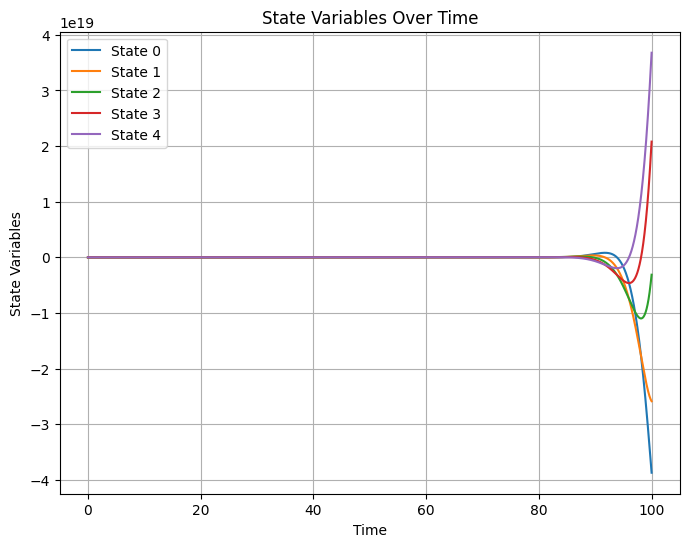

Pickle file saved at: pickle_files/Linear_5D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.5_0.5_0.5_0.5_0.5_IC-1.25_137.5_137.5_12.5_-25.0.pkl

Simulating Lorenz (Set 1)with perturbation factor -0.25
Parameters: [10.0, 28.0, 2.6666666666666665]
Initial conditions: [0.75, 0.75, 0.75]
Expected behavior: chaotic


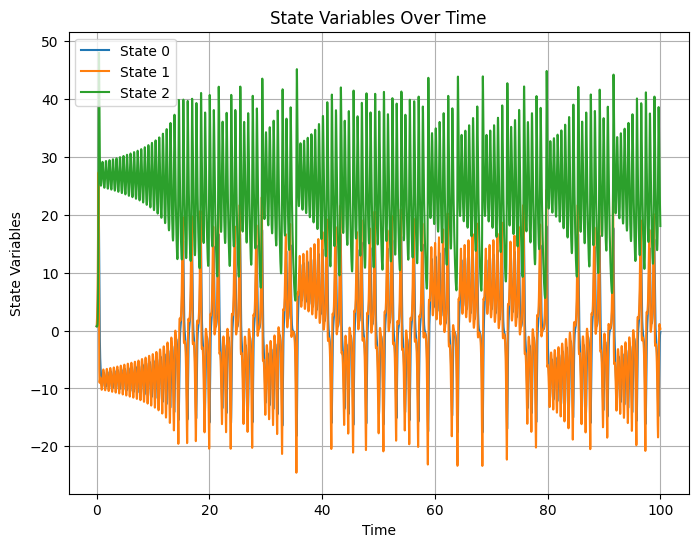

Pickle file saved at: pickle_files/Lorenz_Set-1_Deg-Poly_2_0_Params-10.0_28.0_2.6666666666666665_IC-0.75_0.75_0.75.pkl

Simulating Lorenz (Set 1)with perturbation factor 0.0
Parameters: [10.0, 28.0, 2.6666666666666665]
Initial conditions: [1.0, 1.0, 1.0]
Expected behavior: chaotic


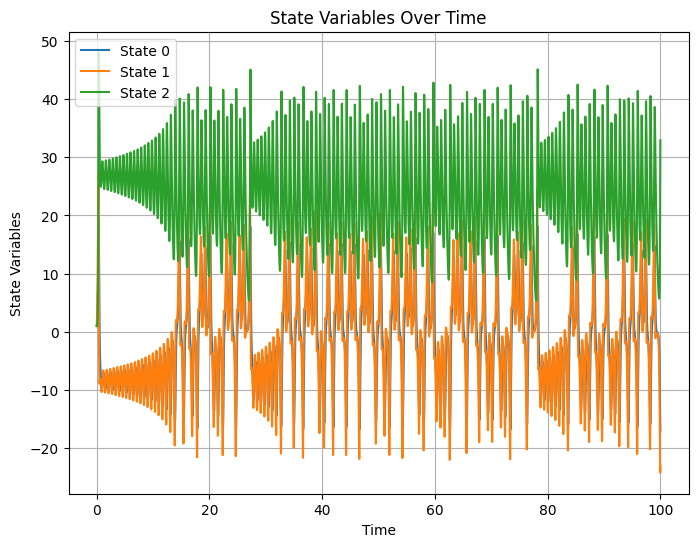

Pickle file saved at: pickle_files/Lorenz_Set-1_Deg-Poly_2_0_Params-10.0_28.0_2.6666666666666665_IC-1.0_1.0_1.0.pkl

Simulating Lorenz (Set 1)with perturbation factor 0.25
Parameters: [10.0, 28.0, 2.6666666666666665]
Initial conditions: [1.25, 1.25, 1.25]
Expected behavior: chaotic


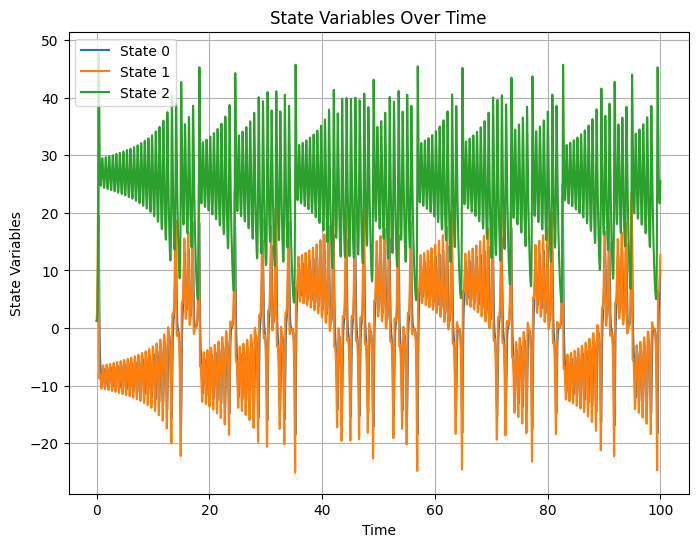

Pickle file saved at: pickle_files/Lorenz_Set-1_Deg-Poly_2_0_Params-10.0_28.0_2.6666666666666665_IC-1.25_1.25_1.25.pkl

Simulating Lorenz (Set 2)with perturbation factor -0.25
Parameters: [10.0, 15.0, 2.6666666666666665]
Initial conditions: [0.375, 0.375, 0.375]
Expected behavior: fixed_point


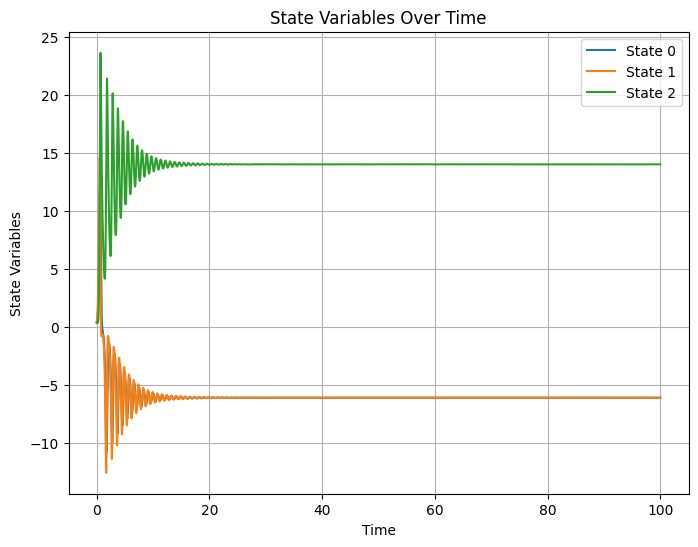

Pickle file saved at: pickle_files/Lorenz_Set-2_Deg-Poly_2_0_Params-10.0_15.0_2.6666666666666665_IC-0.375_0.375_0.375.pkl

Simulating Lorenz (Set 2)with perturbation factor 0.0
Parameters: [10.0, 15.0, 2.6666666666666665]
Initial conditions: [0.5, 0.5, 0.5]
Expected behavior: fixed_point


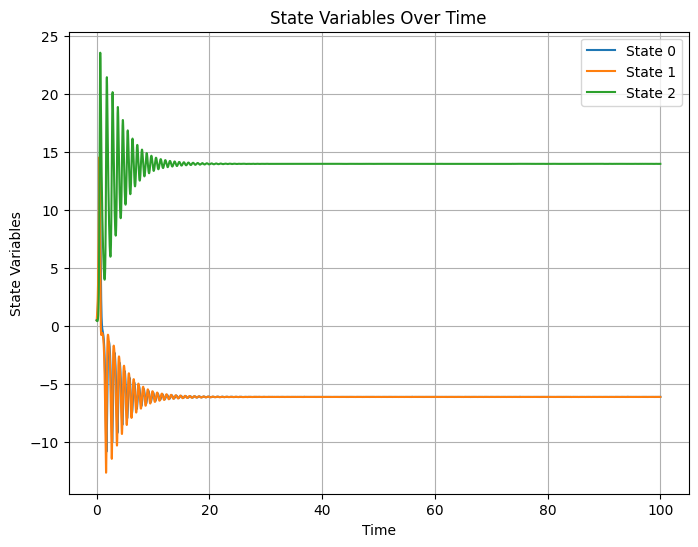

Pickle file saved at: pickle_files/Lorenz_Set-2_Deg-Poly_2_0_Params-10.0_15.0_2.6666666666666665_IC-0.5_0.5_0.5.pkl

Simulating Lorenz (Set 2)with perturbation factor 0.25
Parameters: [10.0, 15.0, 2.6666666666666665]
Initial conditions: [0.625, 0.625, 0.625]
Expected behavior: fixed_point


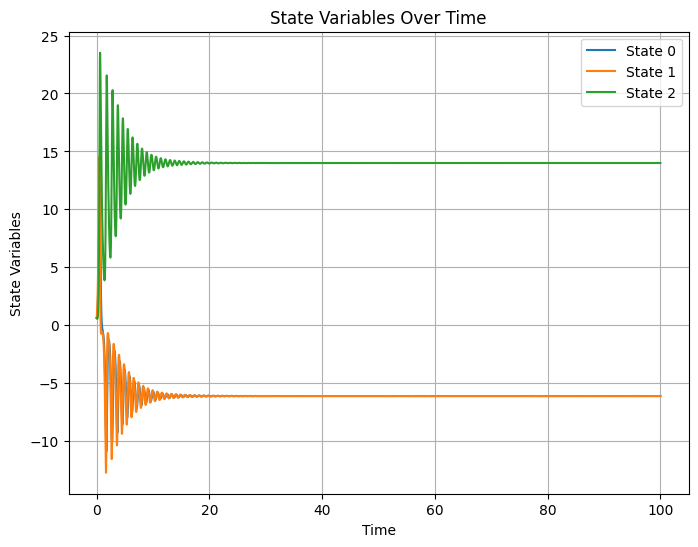

Pickle file saved at: pickle_files/Lorenz_Set-2_Deg-Poly_2_0_Params-10.0_15.0_2.6666666666666665_IC-0.625_0.625_0.625.pkl

Simulating Lorenz (Set 3)with perturbation factor -0.25
Parameters: [10.0, 100.0, 2.6666666666666665]
Initial conditions: [1.5, 1.5, 1.5]
Expected behavior: chaotic


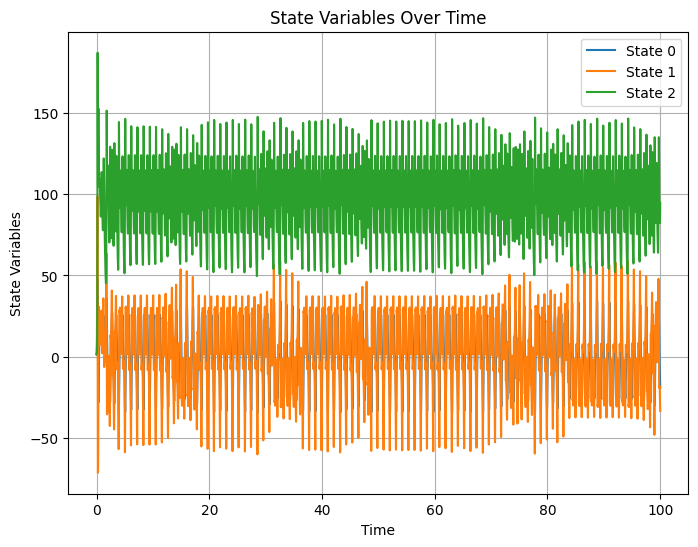

Pickle file saved at: pickle_files/Lorenz_Set-3_Deg-Poly_2_0_Params-10.0_100.0_2.6666666666666665_IC-1.5_1.5_1.5.pkl

Simulating Lorenz (Set 3)with perturbation factor 0.0
Parameters: [10.0, 100.0, 2.6666666666666665]
Initial conditions: [2.0, 2.0, 2.0]
Expected behavior: chaotic


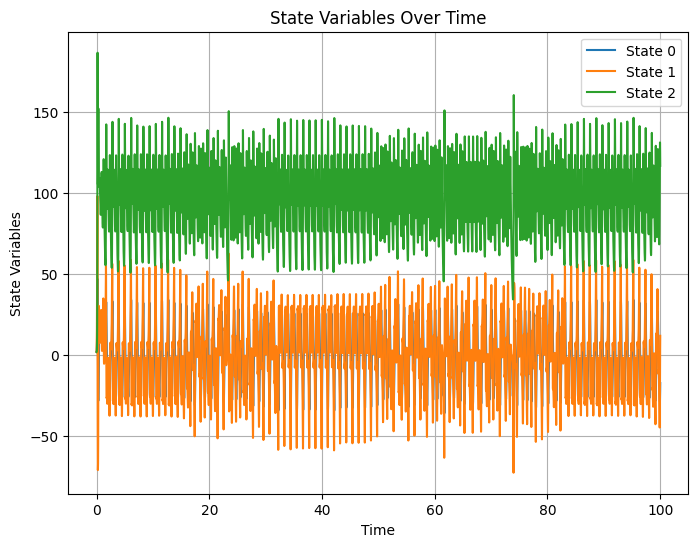

Pickle file saved at: pickle_files/Lorenz_Set-3_Deg-Poly_2_0_Params-10.0_100.0_2.6666666666666665_IC-2.0_2.0_2.0.pkl

Simulating Lorenz (Set 3)with perturbation factor 0.25
Parameters: [10.0, 100.0, 2.6666666666666665]
Initial conditions: [2.5, 2.5, 2.5]
Expected behavior: chaotic


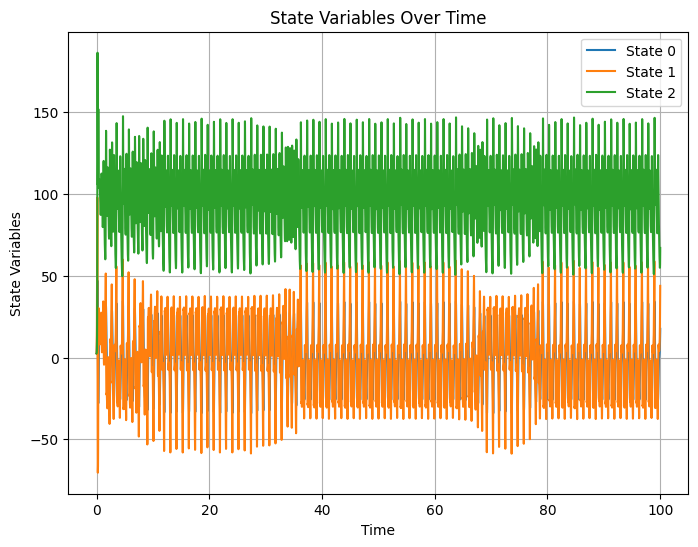

Pickle file saved at: pickle_files/Lorenz_Set-3_Deg-Poly_2_0_Params-10.0_100.0_2.6666666666666665_IC-2.5_2.5_2.5.pkl

Simulating Van_der_Pol (Set 1)with perturbation factor -0.25
Parameters: [0.5]
Initial conditions: [0.75, 0.0]
Expected behavior: cyclic


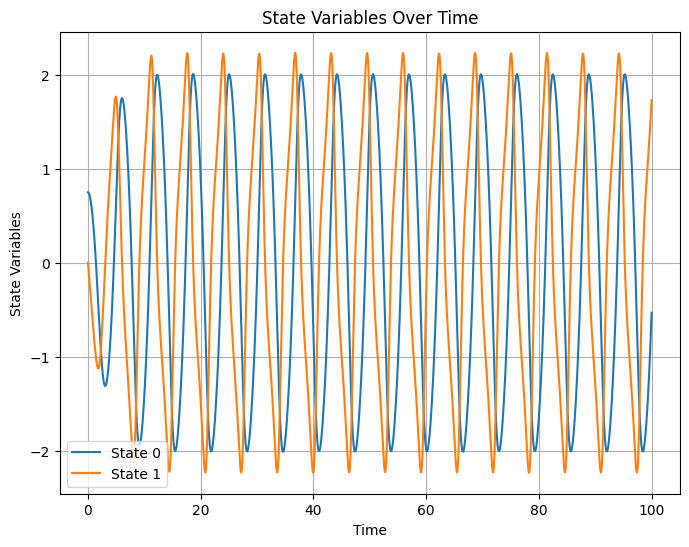

Pickle file saved at: pickle_files/Van_der_Pol_Set-1_Deg-Poly_3_0_Params-0.5_IC-0.75_0.0.pkl

Simulating Van_der_Pol (Set 1)with perturbation factor 0.0
Parameters: [0.5]
Initial conditions: [1.0, 0.0]
Expected behavior: cyclic


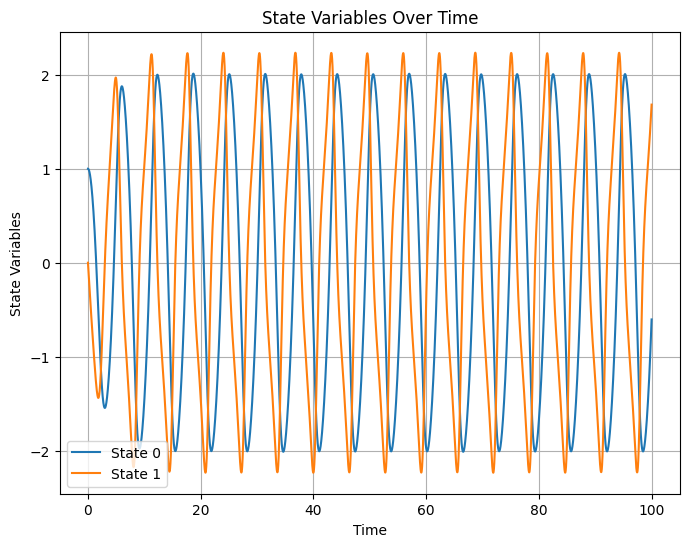

Pickle file saved at: pickle_files/Van_der_Pol_Set-1_Deg-Poly_3_0_Params-0.5_IC-1.0_0.0.pkl

Simulating Van_der_Pol (Set 1)with perturbation factor 0.25
Parameters: [0.5]
Initial conditions: [1.25, 0.0]
Expected behavior: cyclic


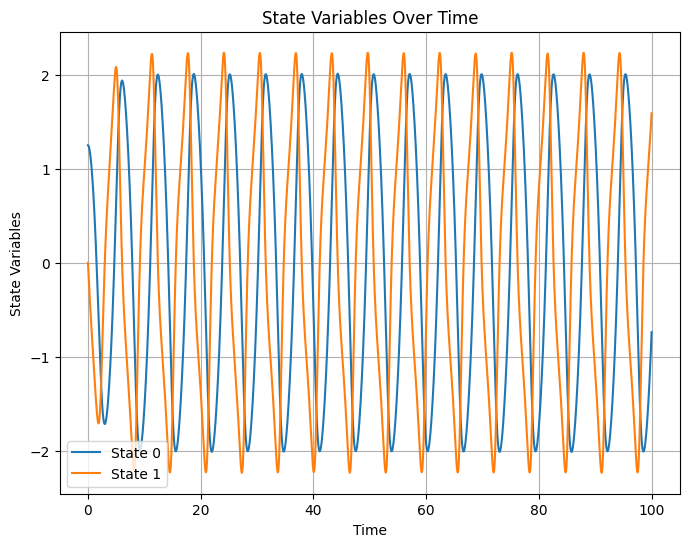

Pickle file saved at: pickle_files/Van_der_Pol_Set-1_Deg-Poly_3_0_Params-0.5_IC-1.25_0.0.pkl

Simulating Van_der_Pol (Set 2)with perturbation factor -0.25
Parameters: [1.0]
Initial conditions: [0.0, 0.75]
Expected behavior: cyclic


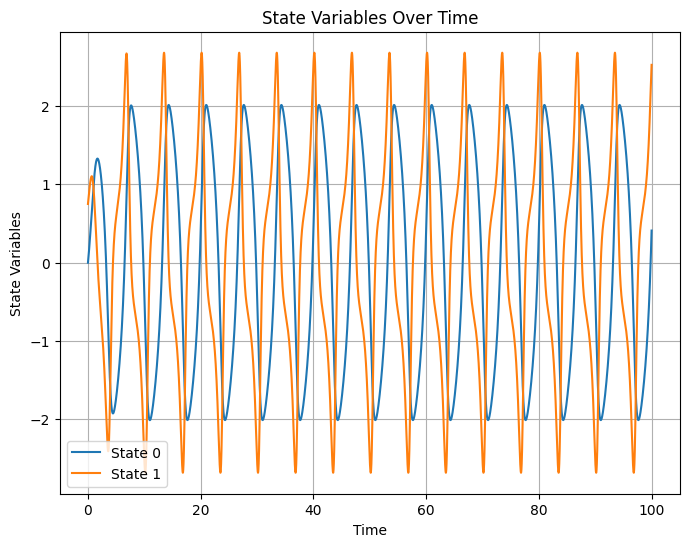

Pickle file saved at: pickle_files/Van_der_Pol_Set-2_Deg-Poly_3_0_Params-1.0_IC-0.0_0.75.pkl

Simulating Van_der_Pol (Set 2)with perturbation factor 0.0
Parameters: [1.0]
Initial conditions: [0.0, 1.0]
Expected behavior: cyclic


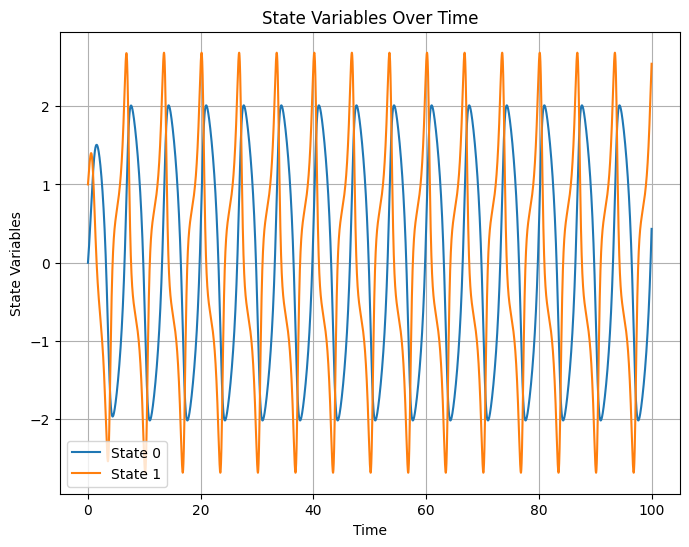

Pickle file saved at: pickle_files/Van_der_Pol_Set-2_Deg-Poly_3_0_Params-1.0_IC-0.0_1.0.pkl

Simulating Van_der_Pol (Set 2)with perturbation factor 0.25
Parameters: [1.0]
Initial conditions: [0.0, 1.25]
Expected behavior: cyclic


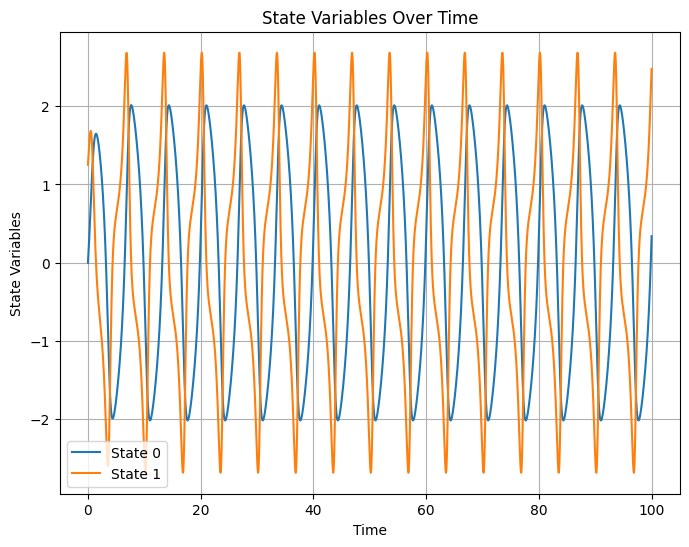

Pickle file saved at: pickle_files/Van_der_Pol_Set-2_Deg-Poly_3_0_Params-1.0_IC-0.0_1.25.pkl

Simulating Van_der_Pol (Set 3)with perturbation factor -0.25
Parameters: [10.0]
Initial conditions: [1.5, 0.0]
Expected behavior: cyclic


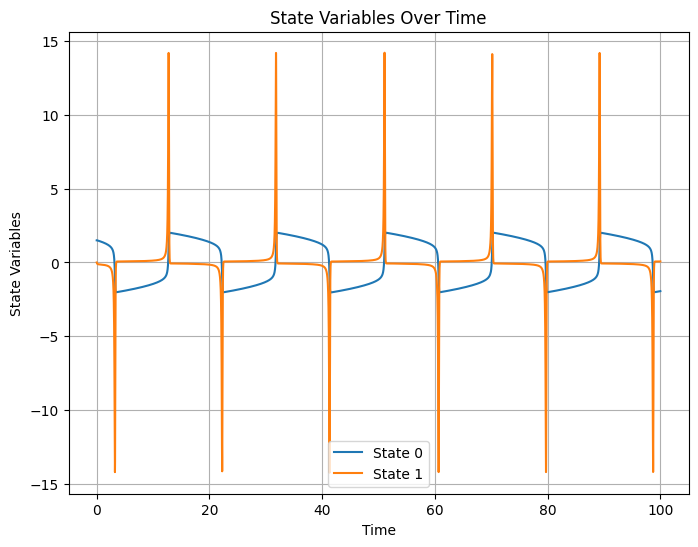

Pickle file saved at: pickle_files/Van_der_Pol_Set-3_Deg-Poly_3_0_Params-10.0_IC-1.5_0.0.pkl

Simulating Van_der_Pol (Set 3)with perturbation factor 0.0
Parameters: [10.0]
Initial conditions: [2.0, 0.0]
Expected behavior: cyclic


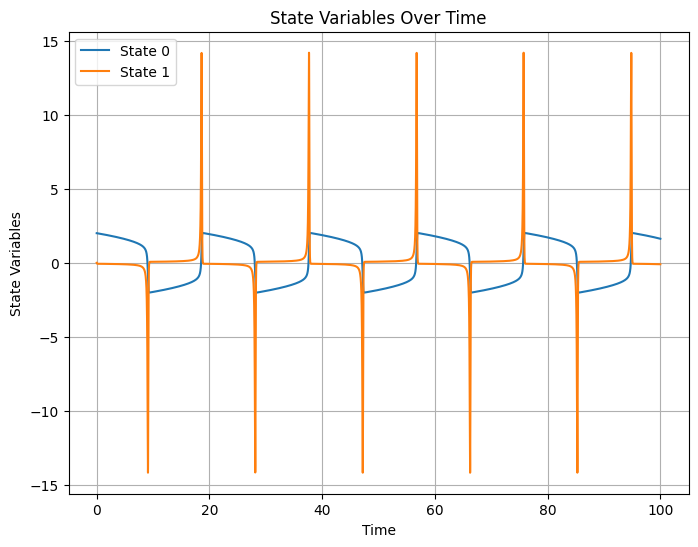

Pickle file saved at: pickle_files/Van_der_Pol_Set-3_Deg-Poly_3_0_Params-10.0_IC-2.0_0.0.pkl

Simulating Van_der_Pol (Set 3)with perturbation factor 0.25
Parameters: [10.0]
Initial conditions: [2.5, 0.0]
Expected behavior: cyclic


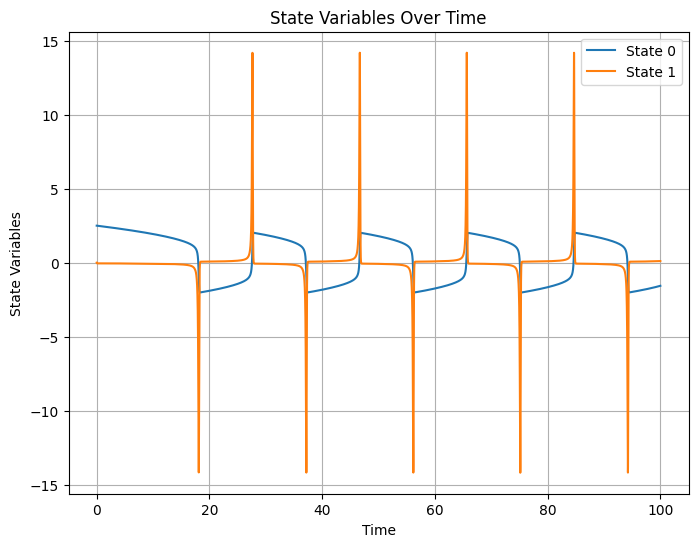

Pickle file saved at: pickle_files/Van_der_Pol_Set-3_Deg-Poly_3_0_Params-10.0_IC-2.5_0.0.pkl

Simulating Van_der_Pol (Set 4)with perturbation factor -0.25
Parameters: [20.0]
Initial conditions: [0.07500000000000001, 0.07500000000000001]
Expected behavior: cyclic


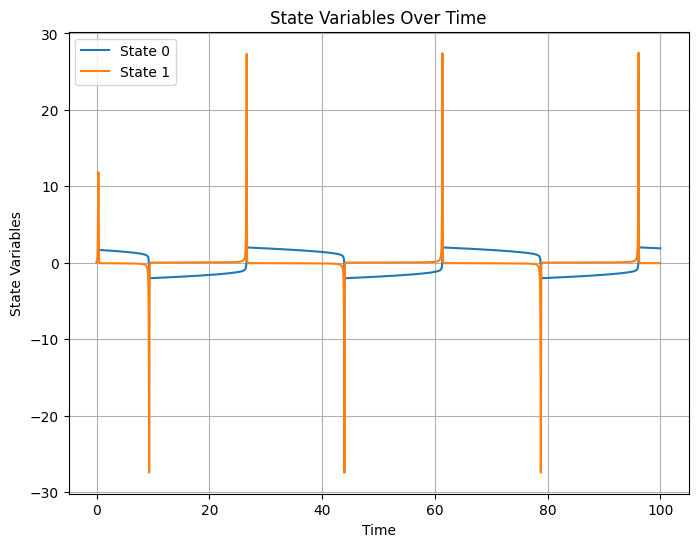

Pickle file saved at: pickle_files/Van_der_Pol_Set-4_Deg-Poly_3_0_Params-20.0_IC-0.07500000000000001_0.07500000000000001.pkl

Simulating Van_der_Pol (Set 4)with perturbation factor 0.0
Parameters: [20.0]
Initial conditions: [0.1, 0.1]
Expected behavior: cyclic


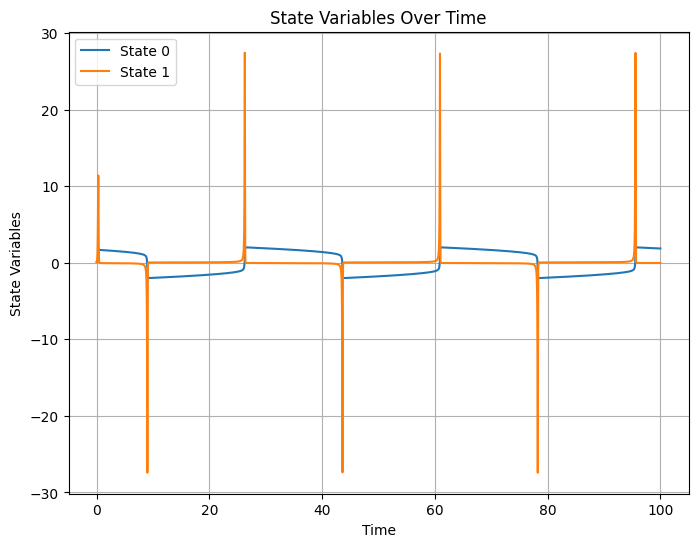

Pickle file saved at: pickle_files/Van_der_Pol_Set-4_Deg-Poly_3_0_Params-20.0_IC-0.1_0.1.pkl

Simulating Van_der_Pol (Set 4)with perturbation factor 0.25
Parameters: [20.0]
Initial conditions: [0.125, 0.125]
Expected behavior: cyclic


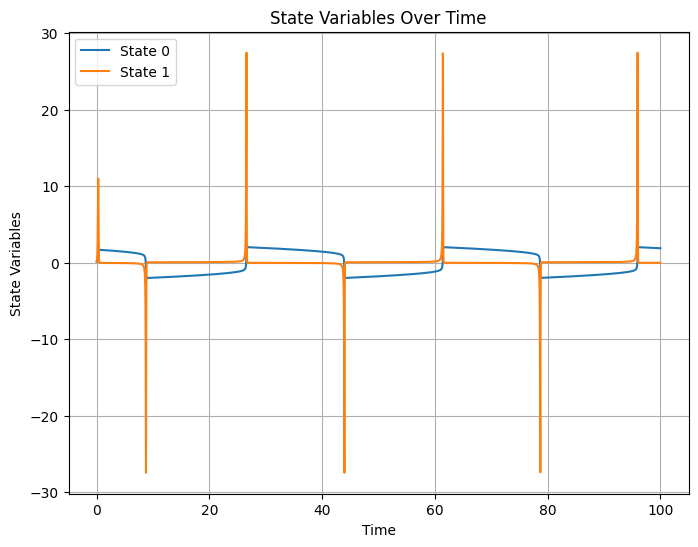

Pickle file saved at: pickle_files/Van_der_Pol_Set-4_Deg-Poly_3_0_Params-20.0_IC-0.125_0.125.pkl

Simulating Rossler (Set 1)with perturbation factor -0.25
Parameters: [0.2, 0.2, 5.7]
Initial conditions: [0.75, 0.75, 0.75]
Expected behavior: chaotic


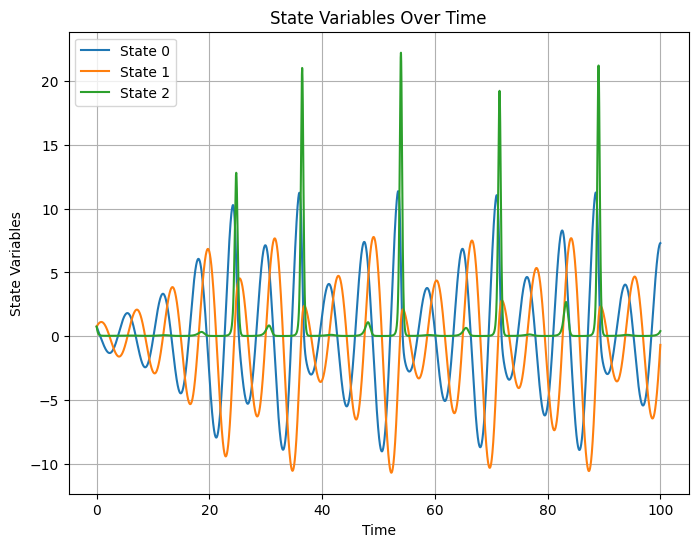

Pickle file saved at: pickle_files/Rossler_Set-1_Deg-Poly_2_0_Params-0.2_0.2_5.7_IC-0.75_0.75_0.75.pkl

Simulating Rossler (Set 1)with perturbation factor 0.0
Parameters: [0.2, 0.2, 5.7]
Initial conditions: [1.0, 1.0, 1.0]
Expected behavior: chaotic


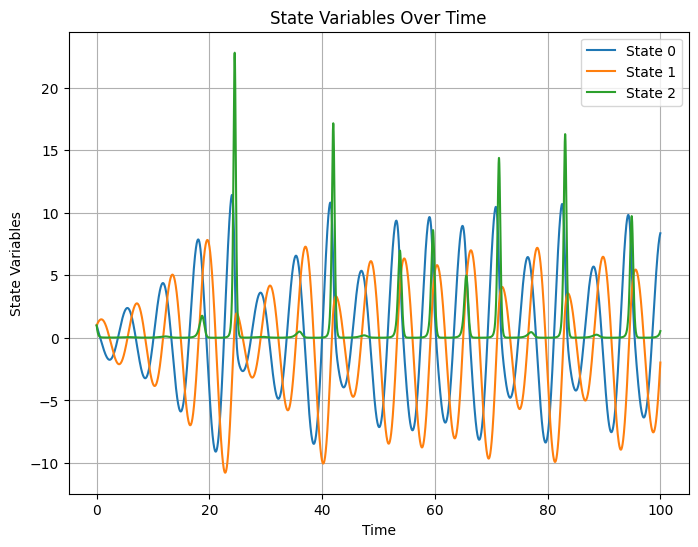

Pickle file saved at: pickle_files/Rossler_Set-1_Deg-Poly_2_0_Params-0.2_0.2_5.7_IC-1.0_1.0_1.0.pkl

Simulating Rossler (Set 1)with perturbation factor 0.25
Parameters: [0.2, 0.2, 5.7]
Initial conditions: [1.25, 1.25, 1.25]
Expected behavior: chaotic


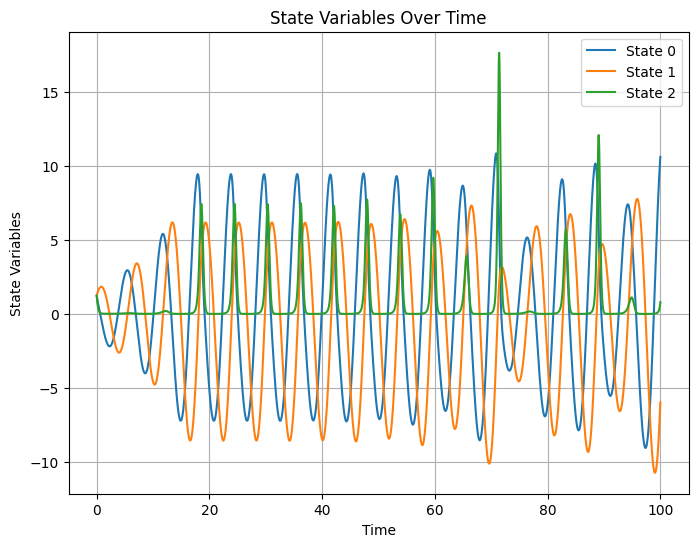

Pickle file saved at: pickle_files/Rossler_Set-1_Deg-Poly_2_0_Params-0.2_0.2_5.7_IC-1.25_1.25_1.25.pkl

Simulating Rossler (Set 2)with perturbation factor -0.25
Parameters: [0.1, 0.1, 6.0]
Initial conditions: [0.375, 0.375, 0.375]
Expected behavior: cyclic


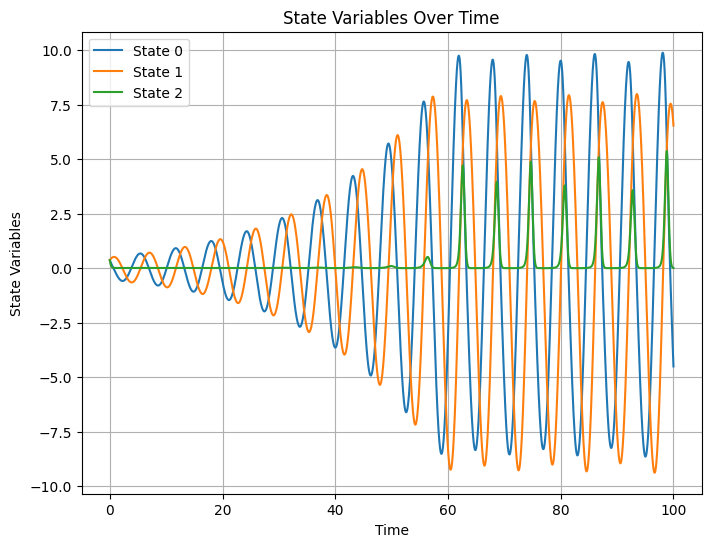

Pickle file saved at: pickle_files/Rossler_Set-2_Deg-Poly_2_0_Params-0.1_0.1_6.0_IC-0.375_0.375_0.375.pkl

Simulating Rossler (Set 2)with perturbation factor 0.0
Parameters: [0.1, 0.1, 6.0]
Initial conditions: [0.5, 0.5, 0.5]
Expected behavior: cyclic


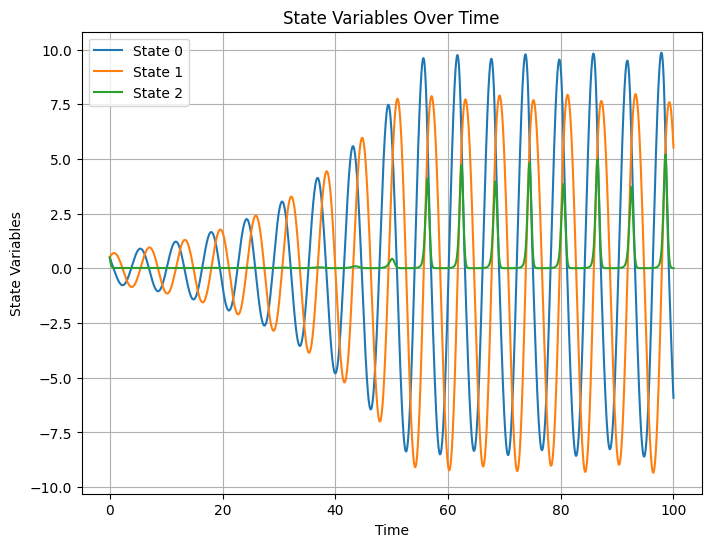

Pickle file saved at: pickle_files/Rossler_Set-2_Deg-Poly_2_0_Params-0.1_0.1_6.0_IC-0.5_0.5_0.5.pkl

Simulating Rossler (Set 2)with perturbation factor 0.25
Parameters: [0.1, 0.1, 6.0]
Initial conditions: [0.625, 0.625, 0.625]
Expected behavior: cyclic


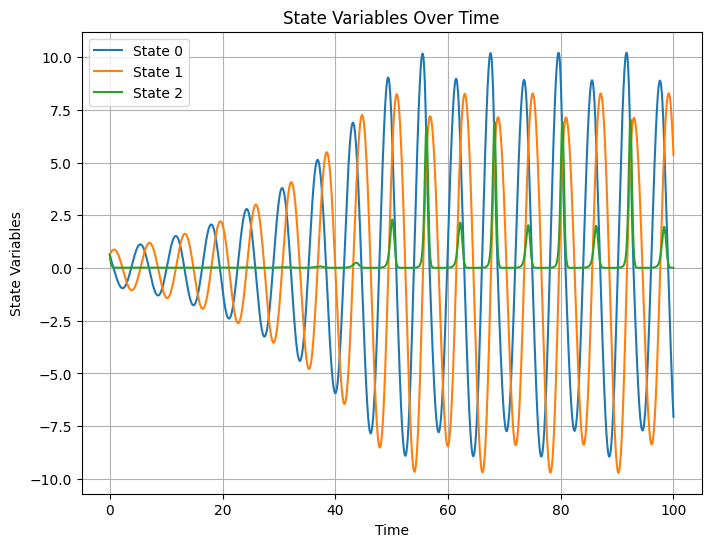

Pickle file saved at: pickle_files/Rossler_Set-2_Deg-Poly_2_0_Params-0.1_0.1_6.0_IC-0.625_0.625_0.625.pkl

Simulating Rossler (Set 3)with perturbation factor -0.25
Parameters: [0.2, 0.2, 10.0]
Initial conditions: [0.75, 0.0, 0.0]
Expected behavior: chaotic


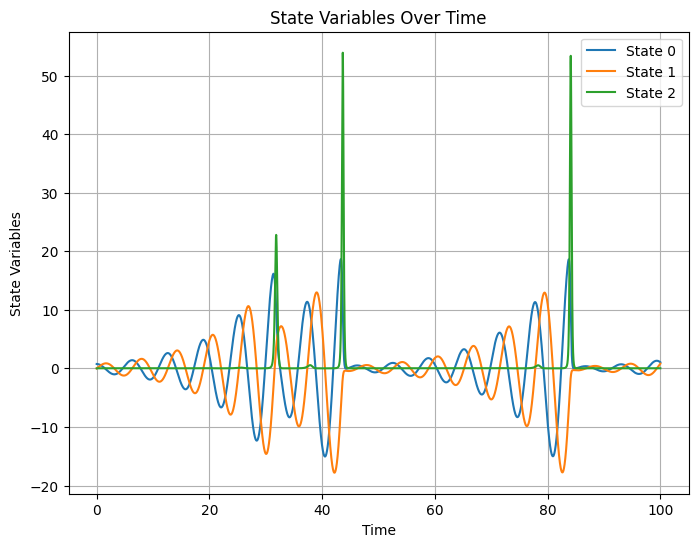

Pickle file saved at: pickle_files/Rossler_Set-3_Deg-Poly_2_0_Params-0.2_0.2_10.0_IC-0.75_0.0_0.0.pkl

Simulating Rossler (Set 3)with perturbation factor 0.0
Parameters: [0.2, 0.2, 10.0]
Initial conditions: [1.0, 0.0, 0.0]
Expected behavior: chaotic


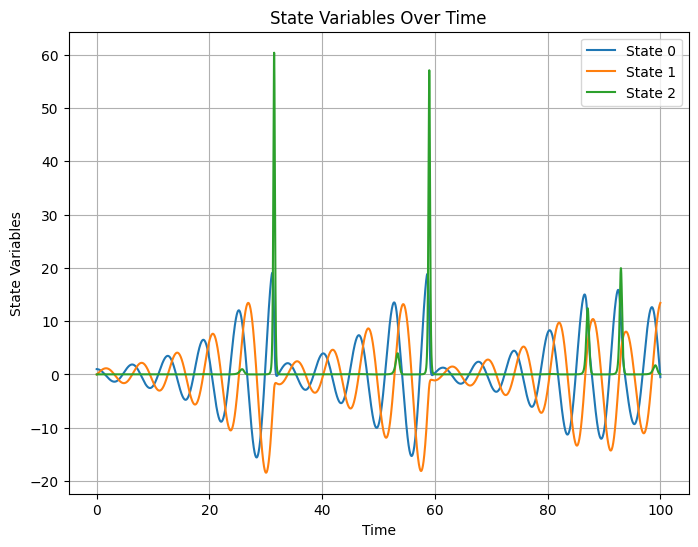

Pickle file saved at: pickle_files/Rossler_Set-3_Deg-Poly_2_0_Params-0.2_0.2_10.0_IC-1.0_0.0_0.0.pkl

Simulating Rossler (Set 3)with perturbation factor 0.25
Parameters: [0.2, 0.2, 10.0]
Initial conditions: [1.25, 0.0, 0.0]
Expected behavior: chaotic


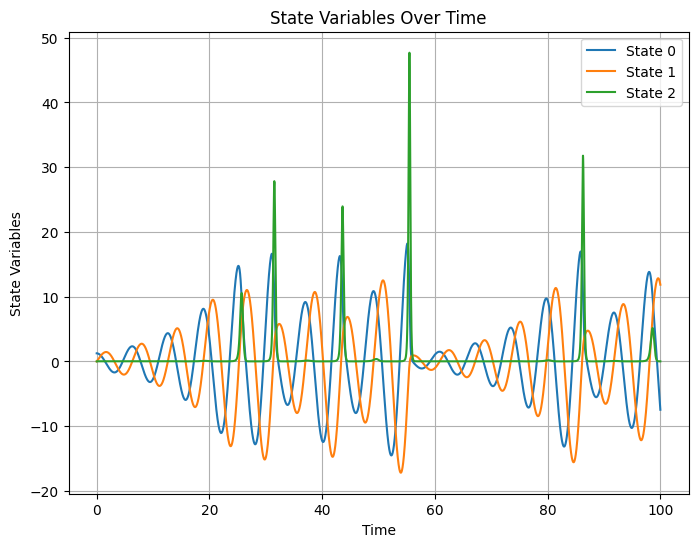

Pickle file saved at: pickle_files/Rossler_Set-3_Deg-Poly_2_0_Params-0.2_0.2_10.0_IC-1.25_0.0_0.0.pkl

Simulating Lorenz96 (Set 1)with perturbation factor -0.25
Parameters: [10.0, 4]
Initial conditions: [0.0, 0.75, 1.5, 2.25]
Expected behavior: cyclic


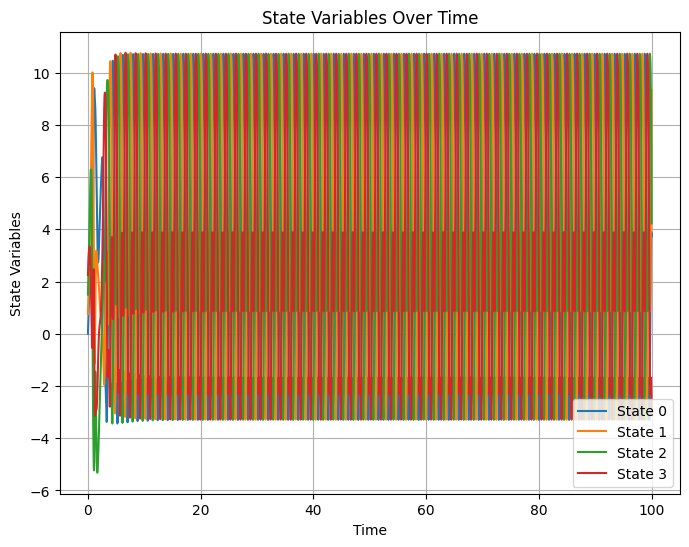

Pickle file saved at: pickle_files/Lorenz96_Set-1_Deg-Poly_2_0_Params-10.0_4_IC-0.0_0.75_1.5_2.25.pkl

Simulating Lorenz96 (Set 1)with perturbation factor 0.0
Parameters: [10.0, 4]
Initial conditions: [0.0, 1.0, 2.0, 3.0]
Expected behavior: cyclic


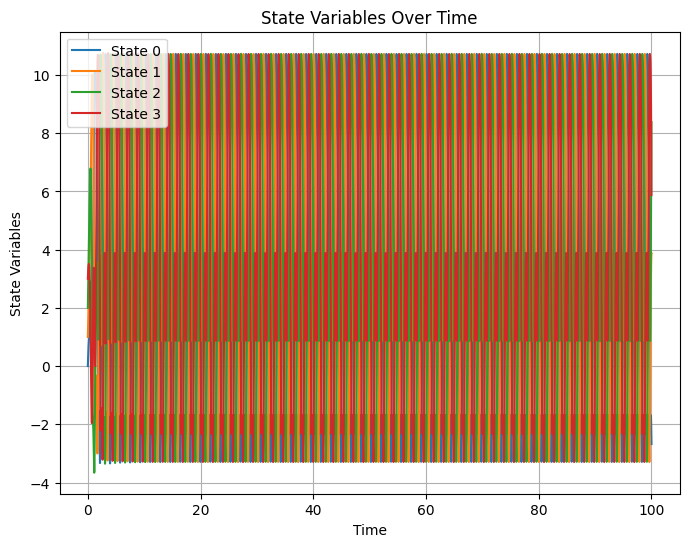

Pickle file saved at: pickle_files/Lorenz96_Set-1_Deg-Poly_2_0_Params-10.0_4_IC-0.0_1.0_2.0_3.0.pkl

Simulating Lorenz96 (Set 1)with perturbation factor 0.25
Parameters: [10.0, 4]
Initial conditions: [0.0, 1.25, 2.5, 3.75]
Expected behavior: cyclic


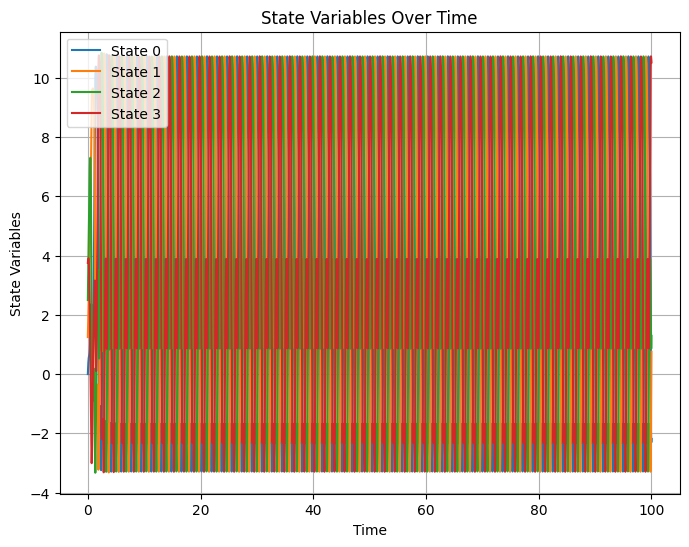

Pickle file saved at: pickle_files/Lorenz96_Set-1_Deg-Poly_2_0_Params-10.0_4_IC-0.0_1.25_2.5_3.75.pkl

Simulating Lorenz96 (Set 2)with perturbation factor -0.25
Parameters: [12.0, 6]
Initial conditions: [0.75, 0.375, 0.375, 0.375, 0.75, 0.0]
Expected behavior: chaotic


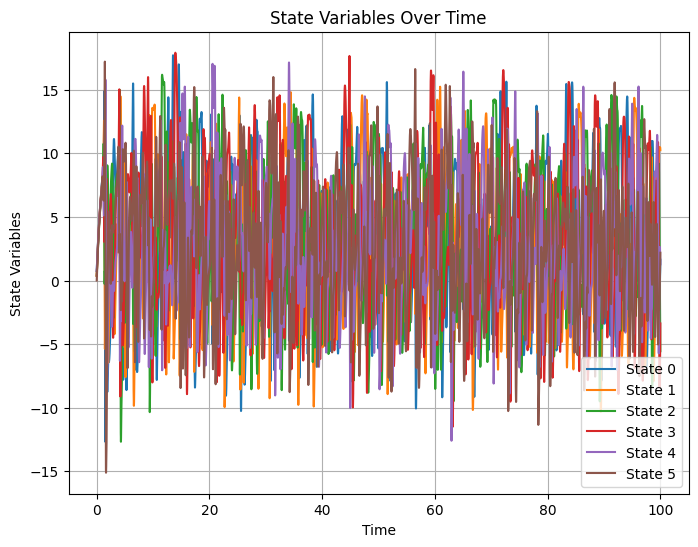

Pickle file saved at: pickle_files/Lorenz96_Set-2_Deg-Poly_2_0_Params-12.0_6_IC-0.75_0.375_0.375_0.375_0.75_0.0.pkl

Simulating Lorenz96 (Set 2)with perturbation factor 0.0
Parameters: [12.0, 6]
Initial conditions: [1.0, 0.5, 0.5, 0.5, 1.0, 0.0]
Expected behavior: chaotic


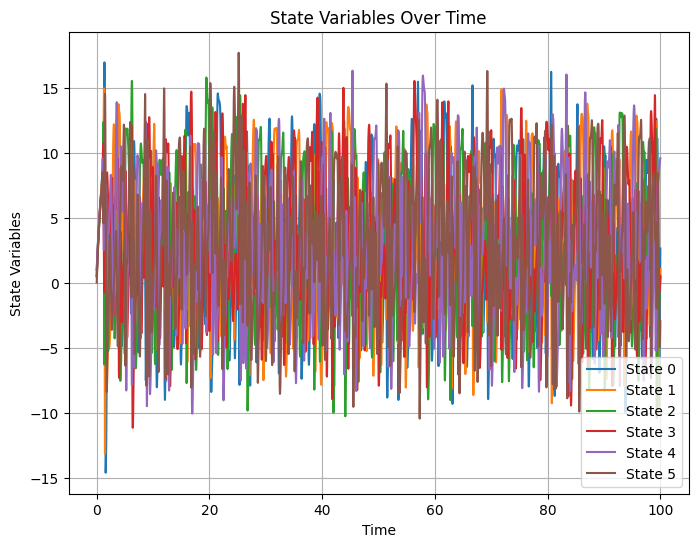

Pickle file saved at: pickle_files/Lorenz96_Set-2_Deg-Poly_2_0_Params-12.0_6_IC-1.0_0.5_0.5_0.5_1.0_0.0.pkl

Simulating Lorenz96 (Set 2)with perturbation factor 0.25
Parameters: [12.0, 6]
Initial conditions: [1.25, 0.625, 0.625, 0.625, 1.25, 0.0]
Expected behavior: chaotic


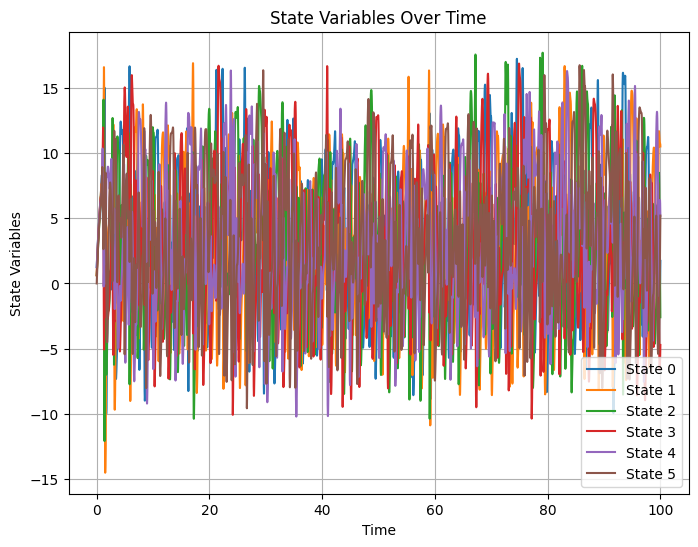

Pickle file saved at: pickle_files/Lorenz96_Set-2_Deg-Poly_2_0_Params-12.0_6_IC-1.25_0.625_0.625_0.625_1.25_0.0.pkl

Simulating Quartic_Oscillator (Set 1)with perturbation factor -0.25
Parameters: [1.0, 0.5]
Initial conditions: [0.75, 0.0]
Expected behavior: cyclic


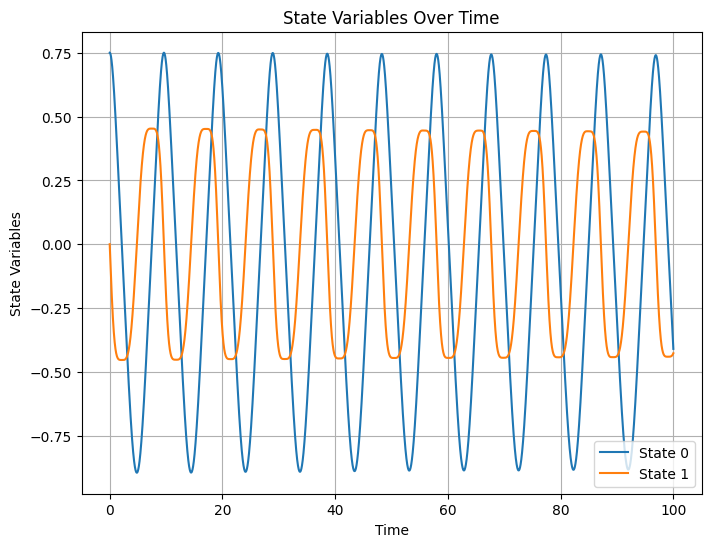

Pickle file saved at: pickle_files/Quartic_Oscillator_Set-1_Deg-Poly_4_0_Params-1.0_0.5_IC-0.75_0.0.pkl

Simulating Quartic_Oscillator (Set 1)with perturbation factor 0.0
Parameters: [1.0, 0.5]
Initial conditions: [1.0, 0.0]
Expected behavior: cyclic


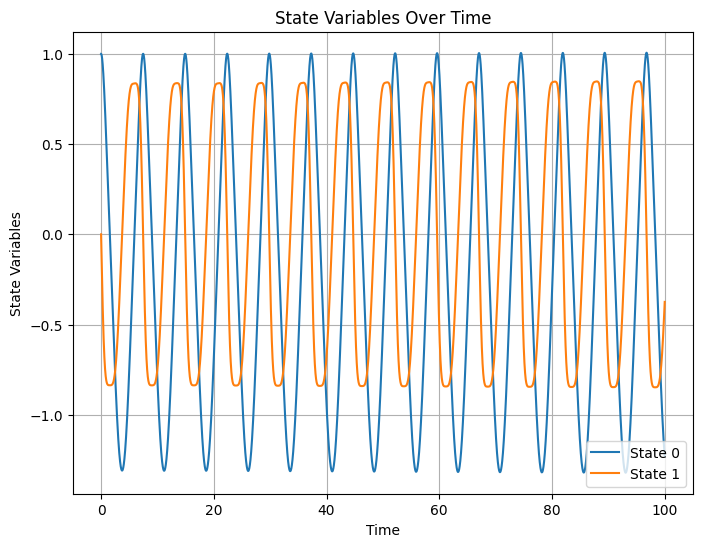

Pickle file saved at: pickle_files/Quartic_Oscillator_Set-1_Deg-Poly_4_0_Params-1.0_0.5_IC-1.0_0.0.pkl

Simulating Quartic_Oscillator (Set 1)with perturbation factor 0.25
Parameters: [1.0, 0.5]
Initial conditions: [1.25, 0.0]
Expected behavior: cyclic


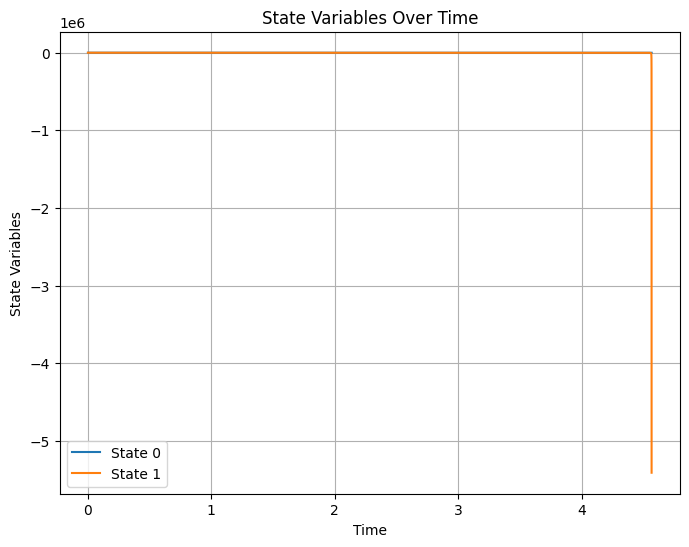

Pickle file saved at: pickle_files/Quartic_Oscillator_Set-1_Deg-Poly_4_0_Params-1.0_0.5_IC-1.25_0.0.pkl

Simulating Quartic_Oscillator (Set 2)with perturbation factor -0.25
Parameters: [1.0, 1.0]
Initial conditions: [0.375, 0.0]
Expected behavior: complex


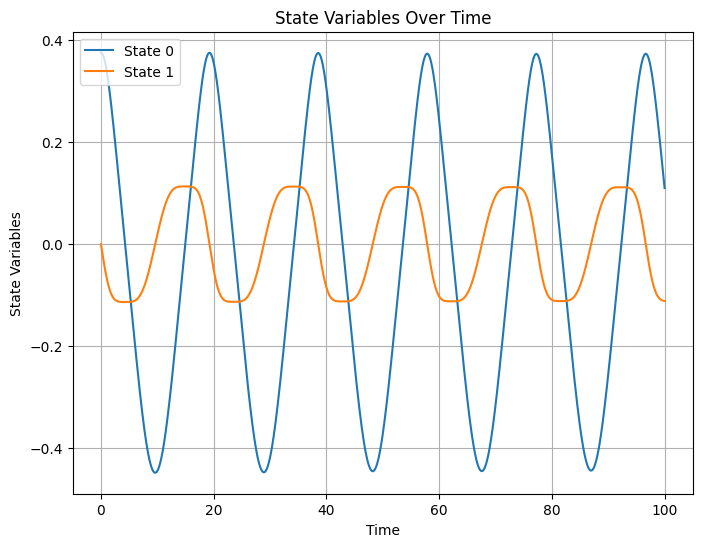

Pickle file saved at: pickle_files/Quartic_Oscillator_Set-2_Deg-Poly_4_0_Params-1.0_1.0_IC-0.375_0.0.pkl

Simulating Quartic_Oscillator (Set 2)with perturbation factor 0.0
Parameters: [1.0, 1.0]
Initial conditions: [0.5, 0.0]
Expected behavior: complex


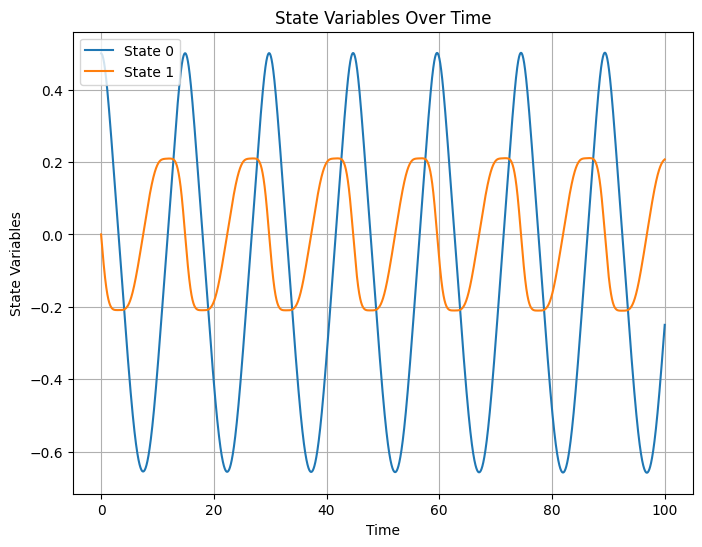

Pickle file saved at: pickle_files/Quartic_Oscillator_Set-2_Deg-Poly_4_0_Params-1.0_1.0_IC-0.5_0.0.pkl

Simulating Quartic_Oscillator (Set 2)with perturbation factor 0.25
Parameters: [1.0, 1.0]
Initial conditions: [0.625, 0.0]
Expected behavior: complex


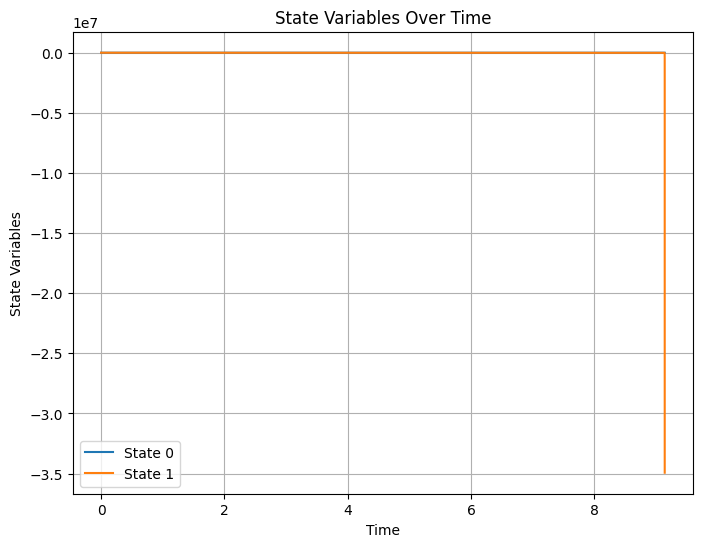

Pickle file saved at: pickle_files/Quartic_Oscillator_Set-2_Deg-Poly_4_0_Params-1.0_1.0_IC-0.625_0.0.pkl

Simulating Lotka_Volterra_Cubic (Set 1)with perturbation factor -0.25
Parameters: [1.0, 0.5, 0.1, 1.0, 0.1]
Initial conditions: [0.375, 0.75]
Expected behavior: cyclic


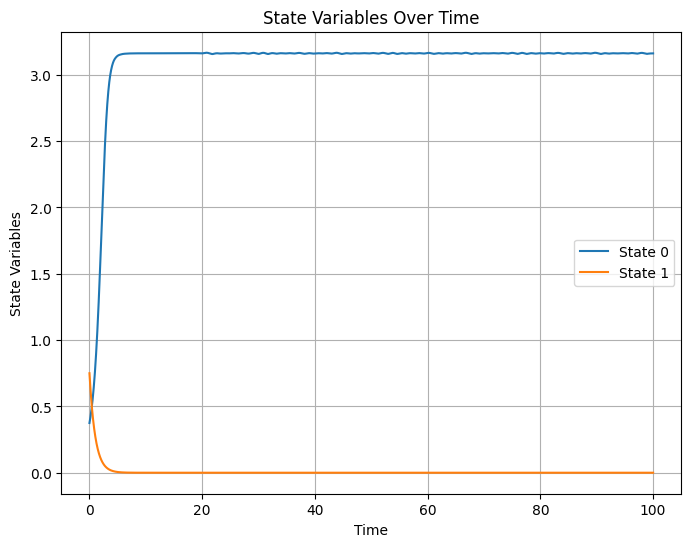

Pickle file saved at: pickle_files/Lotka_Volterra_Cubic_Set-1_Deg-Poly_3_0_Params-1.0_0.5_0.1_1.0_0.1_IC-0.375_0.75.pkl

Simulating Lotka_Volterra_Cubic (Set 1)with perturbation factor 0.0
Parameters: [1.0, 0.5, 0.1, 1.0, 0.1]
Initial conditions: [0.5, 1.0]
Expected behavior: cyclic


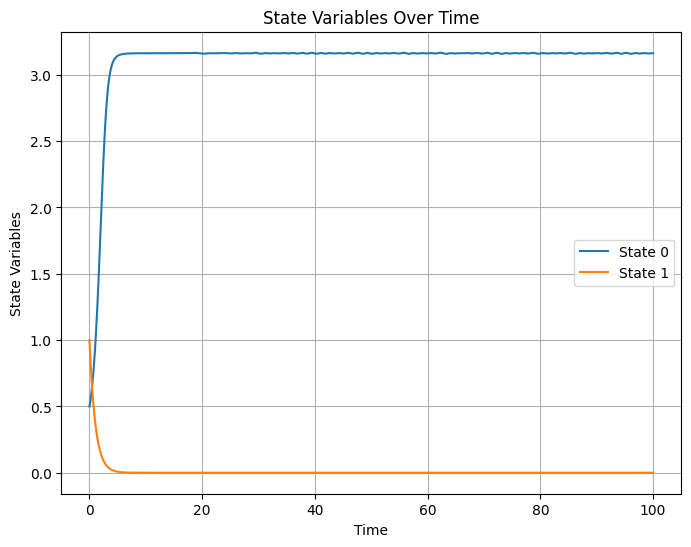

Pickle file saved at: pickle_files/Lotka_Volterra_Cubic_Set-1_Deg-Poly_3_0_Params-1.0_0.5_0.1_1.0_0.1_IC-0.5_1.0.pkl

Simulating Lotka_Volterra_Cubic (Set 1)with perturbation factor 0.25
Parameters: [1.0, 0.5, 0.1, 1.0, 0.1]
Initial conditions: [0.625, 1.25]
Expected behavior: cyclic


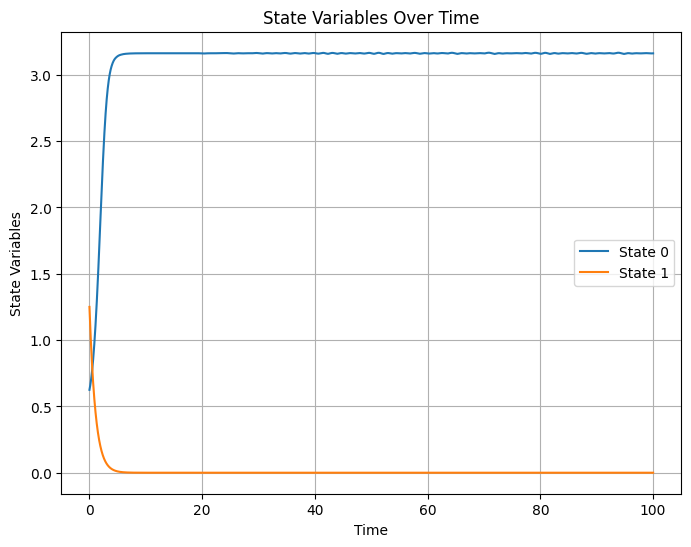

Pickle file saved at: pickle_files/Lotka_Volterra_Cubic_Set-1_Deg-Poly_3_0_Params-1.0_0.5_0.1_1.0_0.1_IC-0.625_1.25.pkl

Simulating Lotka_Volterra_Cubic (Set 2)with perturbation factor -0.25
Parameters: [1.0, 0.5, 0.3, 1.0, 0.2]
Initial conditions: [0.5249999999999999, 0.375]
Expected behavior: complex


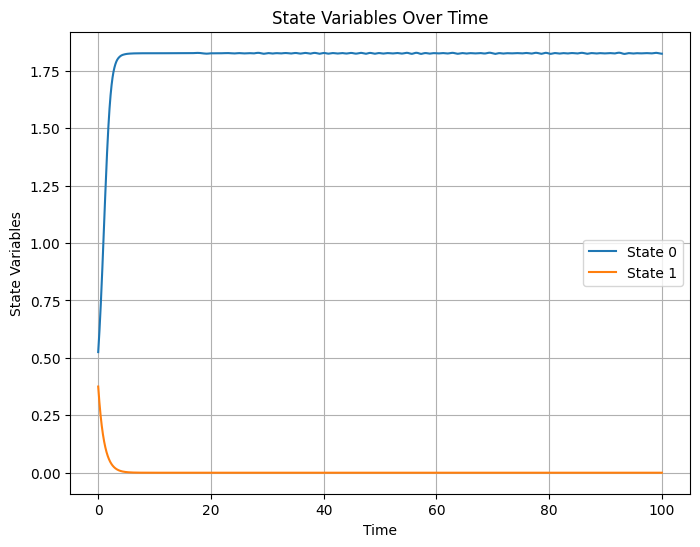

Pickle file saved at: pickle_files/Lotka_Volterra_Cubic_Set-2_Deg-Poly_3_0_Params-1.0_0.5_0.3_1.0_0.2_IC-0.5249999999999999_0.375.pkl

Simulating Lotka_Volterra_Cubic (Set 2)with perturbation factor 0.0
Parameters: [1.0, 0.5, 0.3, 1.0, 0.2]
Initial conditions: [0.7, 0.5]
Expected behavior: complex


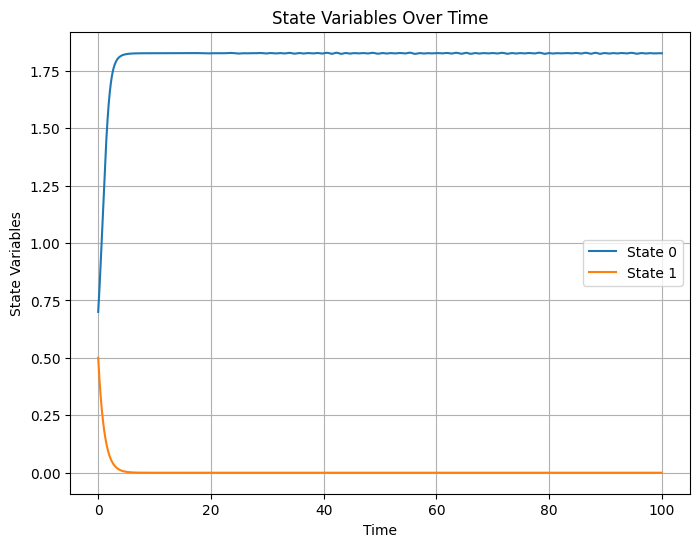

Pickle file saved at: pickle_files/Lotka_Volterra_Cubic_Set-2_Deg-Poly_3_0_Params-1.0_0.5_0.3_1.0_0.2_IC-0.7_0.5.pkl

Simulating Lotka_Volterra_Cubic (Set 2)with perturbation factor 0.25
Parameters: [1.0, 0.5, 0.3, 1.0, 0.2]
Initial conditions: [0.875, 0.625]
Expected behavior: complex


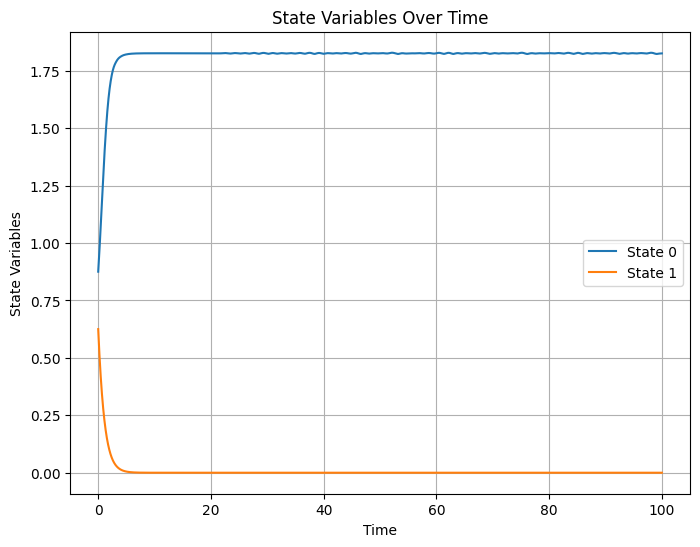

Pickle file saved at: pickle_files/Lotka_Volterra_Cubic_Set-2_Deg-Poly_3_0_Params-1.0_0.5_0.3_1.0_0.2_IC-0.875_0.625.pkl


In [14]:
# Example of how to access the rhs function and parameters_and_IC for the Lorenz system
#system_name = 'Damped_Oscilllator'
#system_name = 'Lorenz'                             #DCF=('Poly', 2, 0)
#system_name = 'Van_der_Pol'                        #DCF=('Poly', 3, 0)
#system_name = 'Lorenz96'                           #DCF=('Poly', 2, 0)
#system_name = 'Rossler'                            #DCF=('Poly', 2, 0)
#system_name = 'Linear_1D'                          #DCF=('Poly', 1, 0)
#system_name = 'Linear_2D_Harmonic_Oscillator'      #DCF=('Poly', 1, 0)
#system_name = 'Linear_3D_Coupled_Oscillators'      #DCF=('Poly', 1, 0)
#system_name = 'Linear_4D_Coupled_Oscillators'      #DCF=('Poly', 1, 0)
#system_name = 'Linear_5D_Coupled_Oscillators'      #DCF=('Poly', 1, 0)
#system_name = 'Duffing_Oscillator'                 #DCF=('Poly', 3, 0)
#system_name = 'Quartic_Oscillator'                 #DCF=('Poly', 4, 0)
#system_name = 'Lotka_Volterra_Cubic'               #DCF=('Poly', 3, 0)
import os
import pickle
import glob

# Counter for the number of samples generated
sample_count = 0


# Perturbation factors
perturbation_factors = [-0.25, 0.0, 0.25]  # Original, +25%, -25%

# **LOOP OVER ALL SYSTEMS AND PARAMETER SETS**
for system_name, system_data in ode_systems.items():
    rhs_func = system_data['rhs_function']
    parameters_and_IC = system_data['parameters_and_IC']
    degree = system_data['DCF_values']
#rhs_func = ode_systems[system_name]['rhs_function']
#parameters_and_IC = ode_systems[system_name]['parameters_and_IC']

# Accessing a specific pair of parameters and initial conditions for the selected system
#param_IC_index = 0



#params = parameters_and_IC[param_IC_index][0]  # Parameter values
#initial_conditions = parameters_and_IC[param_IC_index][1]  # Initial conditions
#description = parameters_and_IC[param_IC_index][2]  # Behavior description

#print(f"Simulating {system_name} system with parameters: {params}")
#print(f"Initial conditions: {initial_conditions}")
#print(f"Expected behavior: {description}")



    for idx, (params, initial_conditions, description) in enumerate(parameters_and_IC):
        for factor in perturbation_factors:
            perturbed_ic = [ic + factor * ic for ic in initial_conditions]
            print(f"\nSimulating {system_name} (Set {idx + 1})with perturbation factor {factor}")
            print(f"Parameters: {params}")
            print(f"Initial conditions: {perturbed_ic}")
            print(f"Expected behavior: {description}")



         # Solve the system
            t_span = (0, 100)
            t_eval = np.linspace(t_span[0], t_span[1], 1000000)
            sol = simulate_ode_system(rhs_func, t_span, perturbed_ic, params, solver='RK45', t_eval=t_eval)

        # Plot results
        #plot_phase_space(sol)
            plot_trajectories(sol)

# Simulating the Lorenz system with first set of parameters and initial conditions
#t_span = (0, 20)
#t_eval = np.linspace(t_span[0], t_span[1], 10000)

#sol = simulate_ode_system(rhs_func, t_span, initial_conditions, params, solver='RK45', t_eval=t_eval)

# Plot phase space and trajectories
#plot_phase_space(sol)
#plot_trajectories(sol)



        # Save as pickle file
            time_series_sample = {
            "Time series": sol,
            "degree": degree
        }


        # Define the folder name for pickle file (generated sample)
            folder_name = "pickle_files"
        # Create the folder if it doesn't exist
            if not os.path.exists(folder_name):
                os.makedirs(folder_name)

        # Convert lists to strings for filenames
            degree_str = "_".join(map(str, degree))
            params_str = "_".join(map(str, params))
            ic_str = "_".join(map(str, perturbed_ic))

        # Store the relevant details in the file name
            file_name = os.path.join(folder_name, f"{system_name}_Set-{idx + 1}_Deg-{degree_str}_Params-{params_str}_IC-{ic_str}.pkl")
 # Save the pickle file in the folder
            with open(file_name, "wb") as f:
                pickle.dump(time_series_sample, f)

            print(f"Pickle file saved at: {file_name}")

        # Increment sample counter
            sample_count += 1



# List all saved pickle files
#pickle_files = glob.glob(f"{folder_name}/*.pkl")
#print("\nAll saved pickle files:")
#print("\n".join(pickle_files))

#List All Pickle Files in the Folder

import glob

# Get all .pkl files inside the folder
pickle_files = glob.glob(f"{folder_name}/*.pkl")







In [15]:
# Print file names
print("Saved pickle files:")
for file in pickle_files:
    print(file)
# Print total count of generated samples
print(f"\nTotal number of samples generated and saved: {sample_count}")

Saved pickle files:
pickle_files/Linear_2D_Harmonic_Oscillator_Set-1_Deg-Poly_1_0_Params-1.0_IC-0.75_0.0.pkl
pickle_files/Van_der_Pol_Set-3_Deg-Poly_3_0_Params-10.0_IC-2.0_0.0.pkl
pickle_files/Linear_2D_Harmonic_Oscillator_Set-1_Deg-Poly_1_0_Params-1.0_IC-1.0_0.0.pkl
pickle_files/Quartic_Oscillator_Set-1_Deg-Poly_4_0_Params-1.0_0.5_IC-1.25_0.0.pkl
pickle_files/Linear_5D_Coupled_Oscillators_Set-2_Deg-Poly_1_0_Params-0.5_0.5_0.5_0.5_0.5_IC-0.75_82.5_82.5_7.5_-15.0.pkl
pickle_files/Lotka_Volterra_Cubic_Set-1_Deg-Poly_3_0_Params-1.0_0.5_0.1_1.0_0.1_IC-0.5_1.0.pkl
pickle_files/Quartic_Oscillator_Set-1_Deg-Poly_4_0_Params-1.0_0.5_IC-0.75_0.0.pkl
pickle_files/Rossler_Set-1_Deg-Poly_2_0_Params-0.2_0.2_5.7_IC-1.0_1.0_1.0.pkl
pickle_files/Van_der_Pol_Set-3_Deg-Poly_3_0_Params-10.0_IC-1.5_0.0.pkl
pickle_files/Van_der_Pol_Set-2_Deg-Poly_3_0_Params-1.0_IC-0.0_0.75.pkl
pickle_files/Lorenz_Set-3_Deg-Poly_2_0_Params-10.0_100.0_2.6666666666666665_IC-1.5_1.5_1.5.pkl
pickle_files/Linear_2D_Harmonic_Oscil